28 MAGGIO 2023
GIORNO CASUALE (MA CHE ALLA FINE E' RISULTATO MOLTO INTERESSANTE)

In [ ]:
from google.colab import files
uploaded = files.upload()





Saving 20230528_UkraineCombinedTweetsDeduped.csv to 20230528_UkraineCombinedTweetsDeduped (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("20230528_UkraineCombinedTweetsDeduped.csv")
df.head()

Unnamed: 0               userid       username  \
0       31771  1599495100547072003    Maks_pl2022   
1       31772  1598645950070792192      KyivClock   
2       31773           2909176641  maria09121953   
3       31774            588697111     themorskoy   
4       31775           1531504262   osadchiy3124   

                                            acctdesc        location  \
0  I help with the restoration of residential bui...  Ukraine, Kiev    
1  Clock tower at central railway station in Kiev...         Ucrania   
2                                                NaN         Украина   
3  Melancholiac, hikikomori, atheist, geek, core ...            Kyiv   
4          Офіційний твіттер Блогера Дмитра Осадчого   Lviv, Ukraine   

   following  followers  totaltweets        usercreatedts  \
0         36         10          815  2022-12-04 20:06:01   
1          6          4         4381  2022-12-02 11:51:26   
2       1044       1523      1625608  2014-12-07 12:41:57   
3        154       4464         4347  2012-05-24 00:32:37   
4       4997        960         9717  2013-06-19 17:39:56   

               tweetid  ... original_tweet_userid  original_tweet_username  \
0  1662609711789686785  ...                     0                      NaN   
1  1662609753065832450  ...                     0                      NaN   
2  1662609818824105986  ...                     0                      NaN   
3  1662609895022026754  ...                     0                      NaN   
4  1662610177940389888  ...                     0                      NaN   

  in_reply_to_status_id  in_reply_to_user_id in_reply_to_screen_name  \
0   1662143783419494400  1599495100547072000             Maks_pl2022   
1   1662600086256250880  1598645950070792192               KyivClock   
2   1662526881701265408            167317309               UKRINFORM   
3                     0                    0                     NaN   
4                     0                    0                     NaN   

  is_quote_status  quoted_status_id  quoted_status_userid  \
0           False                 0                     0   
1           False                 0                     0   
2           False                 0                     0   
3           False                 0                     0   
4           False                 0                     0   

   quoted_status_username                 extractedts  
0                     NaN  2023-05-28 15:32:20.824629  
1                     NaN  2023-05-28 15:32:20.815549  
2                     NaN  2023-05-28 15:32:20.806535  
3                     NaN  2023-05-28 15:32:20.797449  
4                     NaN  2023-05-28 15:32:20.788381  

[5 rows x 29 columns]

<Axes: xlabel='count', ylabel='language'>

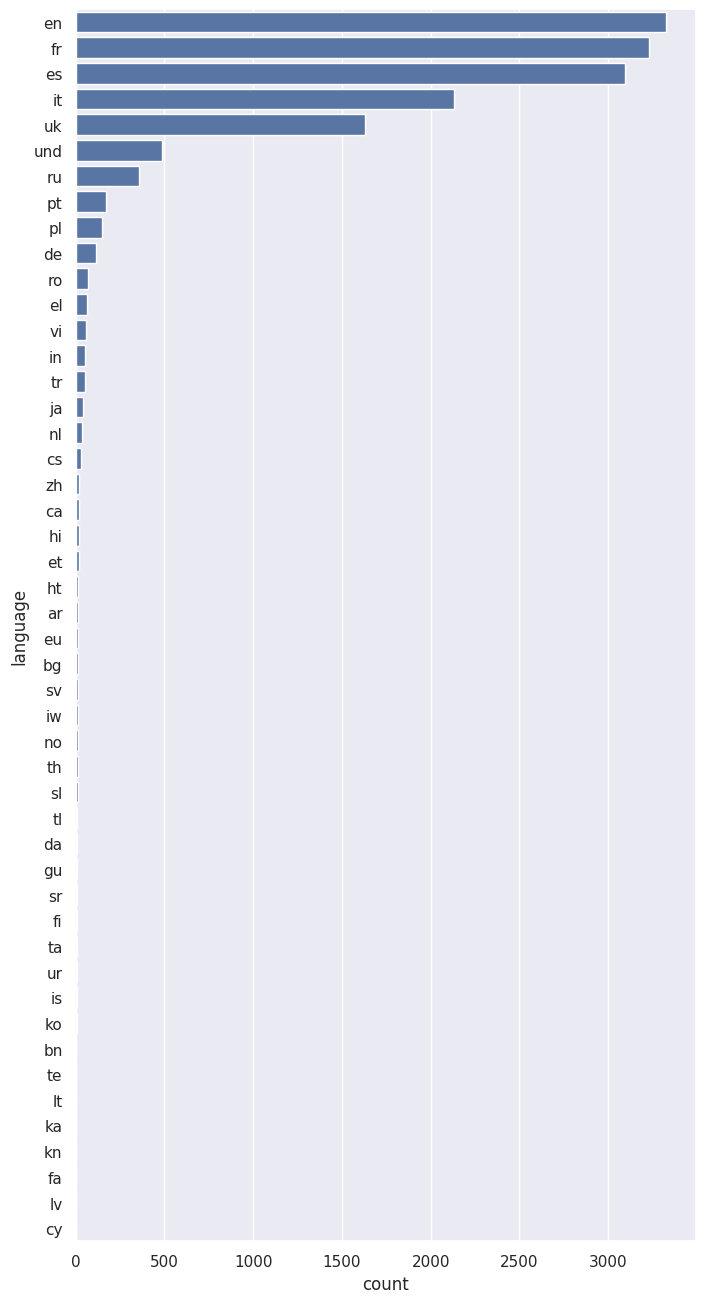

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(8,16))
order = df['language'].value_counts().index
sns.countplot(df, y="language", ax=ax, orient='h', order=order)

In [ ]:
total_samples = df.shape[0]
n_en_samples = df.language.value_counts()['en']
print(f'There are {n_en_samples} samples in English, which corresponds to {(n_en_samples/total_samples)*100:.2f}% of all data')

There are 3327 samples in English, which corresponds to 21.68% of all data


In [ ]:
en_data = df[df.language == 'en'].copy()
en_data[['language','text']]

language                                               text
6           en  Horrific updates and this is still ongoing in ...
9           en  @G_Amundarain Are you serious? \nCould you eve...
10          en  the second wave has begun...\n\n#RussiaIsATerr...
14          en              Exactly this. https://t.co/sHqNl8DbAr
16          en  @G_Amundarain Here are more of "magical weapon...
...        ...                                                ...
15295       en  President #Zelensky is clearly disregarding th...
15300       en  It's the #Seal! Our girls made this #streetart...
15314       en  📷Soldiers of Azov Brigade of Ukrainian Nationa...
15327       en  @stillgray Ian when he reads about 2m and a  s...
15343       en  ✍️Ukraine is reinforcing combat capabilities o...

[3327 rows x 2 columns]

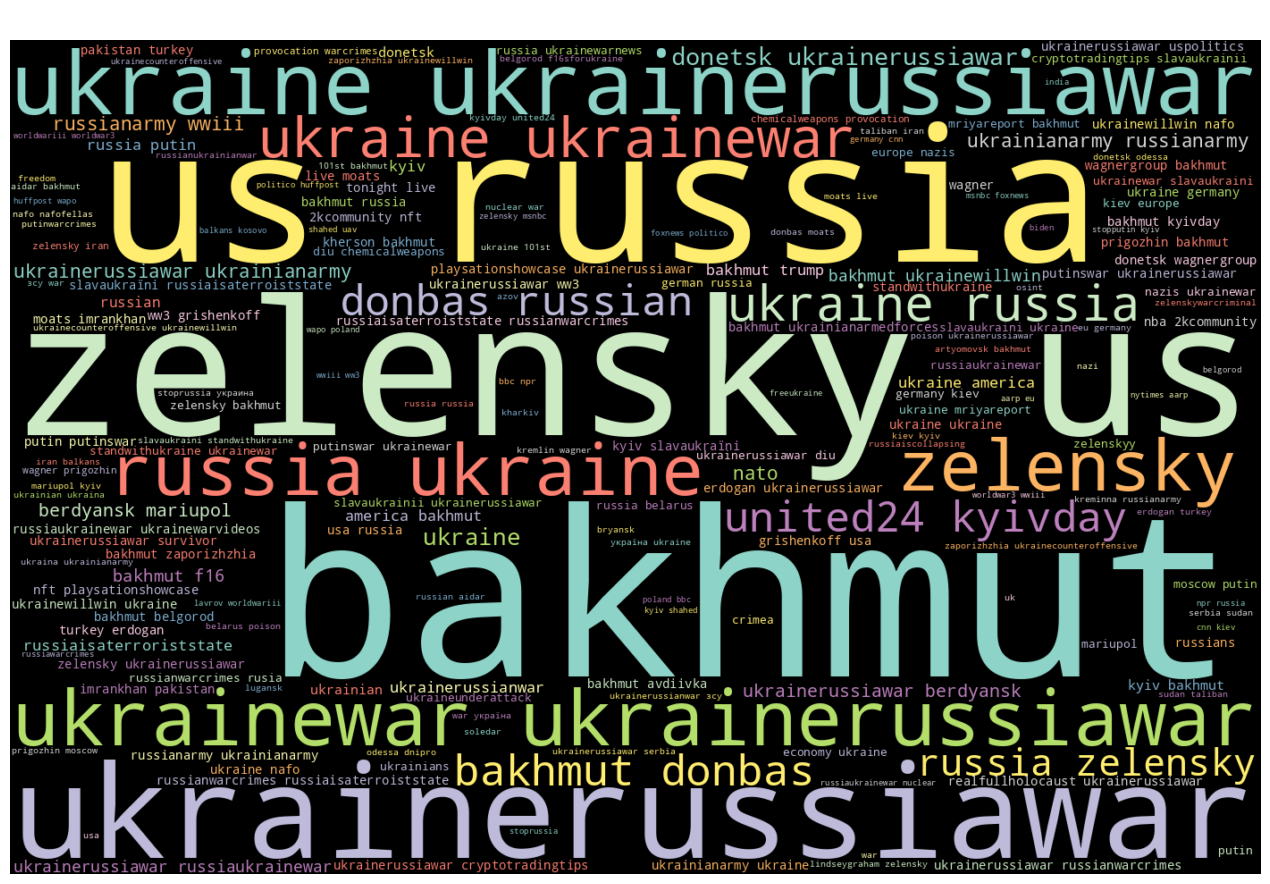

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Estrai gli hashtag
def extract_hashtags(text):
    return re.findall(r"#\w+", str(text).lower())

hashtags = en_data["text"].dropna().apply(extract_hashtags)
all_hashtags = [tag for sublist in hashtags for tag in sublist]
text_for_cloud = " ".join(all_hashtags)

wordcloud = WordCloud(
    width=1400,
    height=933,
    background_color="black",
    colormap="Set3",  # palette colorata e vivace
    max_words=200,
    contour_width=0,
    prefer_horizontal=1.0,
    normalize_plurals=False
).generate(text_for_cloud)

# Mostra il risultato
plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud relativa ai tweet", fontsize=20, color='white')
plt.tight_layout()
plt.show()



In [ ]:

en_data['extractedts'] = pd.to_datetime(en_data['extractedts'])
en_data['extractedts'] = en_data['extractedts'].dt.floor('s')  # arrotonda al secondo
en_data['extractedts']

6       2023-05-28 15:32:20
9       2023-05-28 15:32:20
10      2023-05-28 15:32:20
14      2023-05-28 15:47:20
16      2023-05-28 15:47:20
                ...        
15295   2023-05-29 01:26:55
15300   2023-05-29 01:26:55
15314   2023-05-29 01:26:55
15327   2023-05-29 01:26:55
15343   2023-05-29 01:26:55
Name: extractedts, Length: 3327, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import plotly.express as px

# Assicurati che la colonna sia in formato datetime
en_data['extractedts'] = pd.to_datetime(en_data['extractedts'])

# Raggruppa i tweet per minuto
tweets_per_minute = en_data.groupby(en_data['extractedts'].dt.floor('min')).size().reset_index(name='tweet_count')
tweets_per_minute.columns = ['timestamp', 'tweet_count']

# Crea il grafico interattivo
fig = px.line(
    tweets_per_minute,
    x='timestamp',
    y='tweet_count',
    markers=True,
    title="Numero di tweet per minuto",
    labels={'timestamp': 'Timestamp', 'tweet_count': 'Numero di tweet'}
)

# Migliora il layout
fig.update_layout(
    xaxis=dict(
        tickformat='%Y-%m-%d %H:%M',
        dtick=3600000,  # 1 ora = 3600000 ms
        title='Timestamp'
    ),
    yaxis_title='Numero di nuovi tweet',
    template='plotly_white',
    title_font_size=18
)

# Mostra il grafico
fig.show()

In [ ]:

import pandas as pd

# Definisci i due intervalli
start1 = pd.Timestamp("2023-05-28 11:30:00")
end1 = pd.Timestamp("2023-05-28 12:05:00")
start2 = pd.Timestamp("2023-05-28 16:15:00")
end2 = pd.Timestamp("2023-05-28 16:50:00")

# Applica il filtro combinato
filtered = en_data[
    ((en_data['extractedts'] >= start1) & (en_data['extractedts'] <= end1)) |
    ((en_data['extractedts'] >= start2) & (en_data['extractedts'] <= end2))
]

print("Tweet trovati:", len(filtered))


Tweet trovati: 1197


In [ ]:
prova = filtered[['extractedts', 'text']]


In [ ]:
prova[['text', 'extractedts']]


text         extractedts
97    🇺🇦Air defence forces have just shot down an en... 2023-05-28 16:17:23
111                                   @hotanimeguy stop 2023-05-28 16:17:23
112   4 hours of explosions, russia attacked with Ir... 2023-05-28 16:17:23
114   @MarkHertling Would be awesome to never see hi... 2023-05-28 16:17:23
118   Day 459. This night has been hot again. Lots o... 2023-05-28 16:17:23
...                                                 ...                 ...
7897  Hand-to-hand combat, skeletons of Russians...\... 2023-05-28 16:32:04
7898  #Russian 🇷🇺 occupied #Bakhmut \nThe view from ... 2023-05-28 16:32:04
7902  @LukaszukAB @CailinasEirinn @ABDanielleSmith A... 2023-05-28 16:32:04
7904  In case you missed Oleksandr Gryban @Oleksandr... 2023-05-28 16:32:04
7910  The perpetually hateful and willfully ignorant... 2023-05-28 16:32:04

[1197 rows x 2 columns]

In [ ]:
#Controlla quanti duplicati ci sono prima
n_duplicates1 = prova.duplicated(subset="text").sum()
print(f"🔍 Trovati {n_duplicates1} duplicati nella colonna 'text'.")

# Rimuove i duplicati mantenendo solo la prima occorrenza
prova = prova.drop_duplicates(subset="text", keep="first").reset_index(drop=True)

print(f"✅ Dataset aggiornato. Nuove dimensioni: {prova.shape}")

🔍 Trovati 676 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (521, 2)


In [ ]:
!pip install clean-text
!pip install wordsegment



In [ ]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):
    text = tag[1:]  # Rimuove #

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in WHITELIST or text.lower() in ENGLISH_WORDS:
        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)

def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

prova["text"].apply(segment_hashtag_text)
debug_hashtag_segmentation(prova, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



🔎 Tweet 0:
    #Kyiv ➜ #kyiv
    #RussiaIsATerroristState ➜ #russia is a terrorist state

🔎 Tweet 2:
    #RussiaIsATerroristState ➜ #russia is a terrorist state
    #kyiv ➜ #kyiv
    #mcdonaldsukraine ➜ #mcdonalds ukraine

🔎 Tweet 8:
    #Kyiv ➜ #kyiv
    #StandWithUkraine ➜ #stand with ukraine

🔎 Tweet 9:
    #Kyiv ➜ #kyiv
    #RussiaIsATerroristState ➜ #russia is a terrorist state
    #StandWithUkraine ➜ #stand with ukraine
    #ArmUkraineNow ➜ #arm ukraine now

🔎 Tweet 10:
    #Ukraine ➜ #ukraine
    #StandWithUkraine ➜ #stand with ukraine
    #RussiaIsATerroristState ➜ #russia is a terrorist state

🔎 Tweet 14:
    #unjobs ➜ #un jobs
    #untalent ➜ #un talent
    #hiring ➜ #hiring

🔎 Tweet 17:
    #Ukraine ➜ #ukraine
    #UkraineRussiaWar ➜ #ukraine russia war
    #Kyiv ➜ #kyiv
    #Shahed ➜ #shahed
    #UAV ➜ #uav

🔎 Tweet 18:
    #Ukraine ➜ #ukraine
    #UkraineRussiaWar ➜ #ukraine russia war
    #DIU ➜ #diu
    #ChemicalWeapons ➜ #chemical weapons
    #Provocation ➜ #provocatio

In [ ]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text


In [ ]:
# Segmenta gli hashtag nel testo
prova["text"] = prova["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
prova["text"] = (
    prova["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)


In [ ]:
prova[['text', 'extractedts']]


text         extractedts
0    air defence forces have just shot down an enem... 2023-05-28 16:17:23
1                                                 stop 2023-05-28 16:17:23
2    4 hours of explosions russia attacked with ira... 2023-05-28 16:17:23
3    would be awesome to never see his ugly face again 2023-05-28 16:17:23
4    day 459 this night has been hot again lots of ... 2023-05-28 16:17:23
..                                                 ...                 ...
516  q the storm rider official page 52123 1108am w... 2023-05-28 16:32:04
517  its the seal our girls made this street art ne... 2023-05-28 16:32:04
518  after this ukraine russia war use of drones wi... 2023-05-28 16:32:04
519  handtohand combat skeletons of russians thus t... 2023-05-28 16:32:04
520  alberta has one of the largest concentrations ... 2023-05-28 16:32:04

[521 rows x 2 columns]

In [ ]:
# 1. Installazione (solo la prima volta)
# !pip install bertopic[all]

import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# === 2. Caricamento e filtro ===
giorno = "2023-05-28"
mask = prova['extractedts'].dt.date == pd.to_datetime(giorno).date()
df_day = prova[mask].copy()

texts = df_day["text"].dropna().astype(str).tolist()
print(f"Tweet analizzati per il {giorno}: {len(texts)}")

# === 3. Setup BERTopic ===
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
topic_model = BERTopic(
    embedding_model=embedding_model,
    language="multilingual",
    verbose=True,
    calculate_probabilities=True
)

# === 4. Topic Modeling ===
topics, probs = topic_model.fit_transform(texts)

# === 5. Assegna topic al DataFrame ===
df_day["topic"] = topics

# === 6. Visualizza tutti i topic con 5 tweet per ciascuno ===
print("\n=== RIEPILOGO TOPIC ===")
print(topic_model.get_topic_info())

print("\n=== ESEMPI DI TWEET PER TOPIC ===")
unique_topics = df_day["topic"].unique()
for topic_id in sorted(unique_topics):
    print(f"\n🔹 TOPIC {topic_id} — {topic_model.get_topic(topic_id)}")

    tweets = df_day[df_day["topic"] == topic_id]["text"].dropna().tolist()
    num_to_show = min(len(tweets), 5)

    if num_to_show == 0:
        print("(Nessun tweet disponibile)")
    else:
        print(f"\nEsempi di tweet (max 5):")
        for i in range(num_to_show):
            print(f" - {tweets[i]}")






Tweet analizzati per il 2023-05-28: 521


2025-06-07 15:25:19,271 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/17 [00:00<?, ?it/s]

2025-06-07 15:25:20,128 - BERTopic - Embedding - Completed ✓
2025-06-07 15:25:20,130 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-06-07 15:25:21,905 - BERTopic - Dimensionality - Completed ✓
2025-06-07 15:25:21,909 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-07 15:25:21,956 - BERTopic - Cluster - Completed ✓
2025-06-07 15:25:21,962 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-06-07 15:25:22,011 - BERTopic - Representation - Completed ✓



=== RIEPILOGO TOPIC ===
   Topic  Count                           Name  \
0     -1    122      -1_ukraine_war_the_russia   
1      0    336       0_ukraine_the_war_russia   
2      1     31     1_ukraine_war_drones_drone   
3      2     19  2_graham_money_russians_spent   
4      3     13          3_media_the_russia_in   

                                      Representation  \
0  [ukraine, war, the, russia, of, to, and, in, w...   
1  [ukraine, the, war, russia, of, in, to, bakhmu...   
2  [ukraine, war, drones, drone, of, russia, the,...   
3  [graham, money, russians, spent, best, senator...   
4  [media, the, russia, in, ukraine, war, and, st...   

                                 Representative_Docs  
0  [british intelligence ukraine war map as of to...  
1  [russian airborne troops somewhere in ukraine ...  
2  [russian army launched a massive drone attack ...  
3  [us senator lindsey graham during a meeting wi...  
4  [the british propaganda newspaper the times ha...  

=== ES

In [ ]:
# 8. === Visualizzazioni ===
# Mappa interattiva dei topic
topic_model.visualize_topics().show()

df_day["timestamp"] = df_day["extractedts"]

df_day["timestamp"] = df_day["extractedts"]

# 1. Calcola topics over time (senza usare keyword!)
topics_over_time = topic_model.topics_over_time(
    df_day["text"].tolist(),
    df_day["timestamp"].tolist()
)

# 2. Visualizzazione interattiva
fig = topic_model.visualize_topics_over_time(topics_over_time)
fig.show()


38it [00:02, 15.36it/s]


In [ ]:
!pip install transformers --quiet


In [ ]:
from transformers import pipeline

# Pipeline di classificazione emozionale
emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Funzione per ottenere emozione dominante
def extract_emotion(text):
    try:
        scores = emotion_model(text[:512])[0]  # Troncamento per sicurezza
        top_emotion = max(scores, key=lambda x: x['score'])
        return top_emotion['label'], round(top_emotion['score'], 3)
    except:
        return None, None

# Applica a ogni tweet
df_day[["emotion", "emotion_score"]] = df_day["text"].apply(
    lambda x: pd.Series(extract_emotion(x))
)


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Colonne effettivamente presenti
columns_to_save = [
    "extractedts", "text", "topic", "emotion", "emotion_score"
]

# Salva in CSV
df_day[columns_to_save].to_csv("tweet_topic_emotion.csv", index=False)

print("✅ Risultati salvati nel file: tweet_topic_emotion.csv")



✅ Risultati salvati nel file: tweet_topic_emotion.csv


In [ ]:
import plotly.express as px

# Conta i tweet per coppia (topic, emozione)
emotion_topic = df_day.groupby(["topic", "emotion"]).size().reset_index(name="count")

# Crea grafico stacked bar interattivo
fig = px.bar(
    emotion_topic,
    x="topic",
    y="count",
    color="emotion",
    title="Distribuzione emozionale per topic",
    labels={"count": "Numero di tweet", "topic": "Topic", "emotion": "Emozione"},
)

fig.update_layout(
    barmode="stack",
    xaxis_type="category",
    template="plotly_white",
    legend_title="Emozione"
)

fig.show()




In [ ]:
import plotly.express as px

# Conta il numero di tweet per emozione
emotion_counts = df_day["emotion"].value_counts().reset_index()
emotion_counts.columns = ["emotion", "tweet_count"]

# Crea il grafico interattivo
fig = px.bar(
    emotion_counts,
    x="emotion",
    y="tweet_count",
    color="emotion",
    title="Distribuzione delle emozioni nei tweet",
    labels={"emotion": "Emozione", "tweet_count": "Numero di tweet"},
)

fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white"
)

fig.show()


FINE 28 MAGGIO 2023
INIZIO 11 NOVEMBRE 2022 CON LA LIBERAZIONE DI KHERSON
SCOPO? VEDERE SE VI E' UN SENTIMENTO PREVALENTEMENTE DI FELICITA' DOPO LA LIBERAZIONE UKRAINA


# Dal 10 al 16 novembre 2022
#📌 Liberazione di Kherson

Le forze russe si ritirano dalla città di Kherson. È una delle vittorie simbolicamente più forti dell’Ucraina.

Su Twitter possiamo trovare dei sentimenti sicuramente più felici tra la popolazione mondiale

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_unificato.csv to dataset_unificato.csv


In [ ]:
import pandas as pd

du = pd.read_csv("dataset_unificato.csv")
du.head()

Unnamed: 0               userid         username  \
0       16198             49475701     TheMediaLine   
1       16199            265275949      TimeCheckUK   
2       16200             43316985    humanmade_net   
3       16201  1512400441103032323  ShelterAnimalUA   
4       16202  1222084828100775945   Odessa_Journal   

                                            acctdesc         location  \
0  An independent American news agency specializi...  The Middle East   
1  Follow for short UK time checks, on the hour. ...  LDN CDF EDN BFS   
2  https://t.co/C6G1nLm2sz Authors & Books 📚 Prom...  Same Ol' Planet   
3  Shelter for abandoned dogs and cats. 1400 dogs...          Ukraine   
4  THE ENGLISH VOICE OF ODESSA\n#Odessa #Ukraine ...  Odessa, Ukraine   

   following  followers  totaltweets        usercreatedts  \
0        324       1938        18061  2009-06-22 00:12:22   
1          6         74       101989  2011-03-13 08:40:09   
2       5966       5550        30399  2009-05-29 11:59:32   
3        773        140         2115  2022-04-08 12:02:47   
4        658       9245         5716  2020-01-28 09:12:51   

               tweetid  ... original_tweet_userid  original_tweet_username  \
0  1590494444570128386  ...                     0                      NaN   
1  1590494445111107586  ...                     0                      NaN   
2  1590494445895667713  ...                     0                      NaN   
3  1590494446151299072  ...                     0                      NaN   
4  1590494446335819776  ...                     0                      NaN   

  in_reply_to_status_id in_reply_to_user_id in_reply_to_screen_name  \
0                     0                   0                     NaN   
1                     0                   0                     NaN   
2                     0                   0                     NaN   
3                     0                   0                     NaN   
4                     0                   0                     NaN   

  is_quote_status  quoted_status_id  quoted_status_userid  \
0           False                 0                     0   
1           False                 0                     0   
2           False                 0                     0   
3           False                 0                     0   
4           False                 0                     0   

   quoted_status_username                 extractedts  
0                     NaN  2022-11-10 02:08:24.088981  
1                     NaN  2022-11-10 02:57:03.995371  
2                     NaN  2022-11-10 02:08:24.078988  
3                     NaN  2022-11-10 05:24:13.847020  
4                     NaN  2022-11-10 07:06:41.032804  

[5 rows x 29 columns]

<Axes: xlabel='count', ylabel='language'>

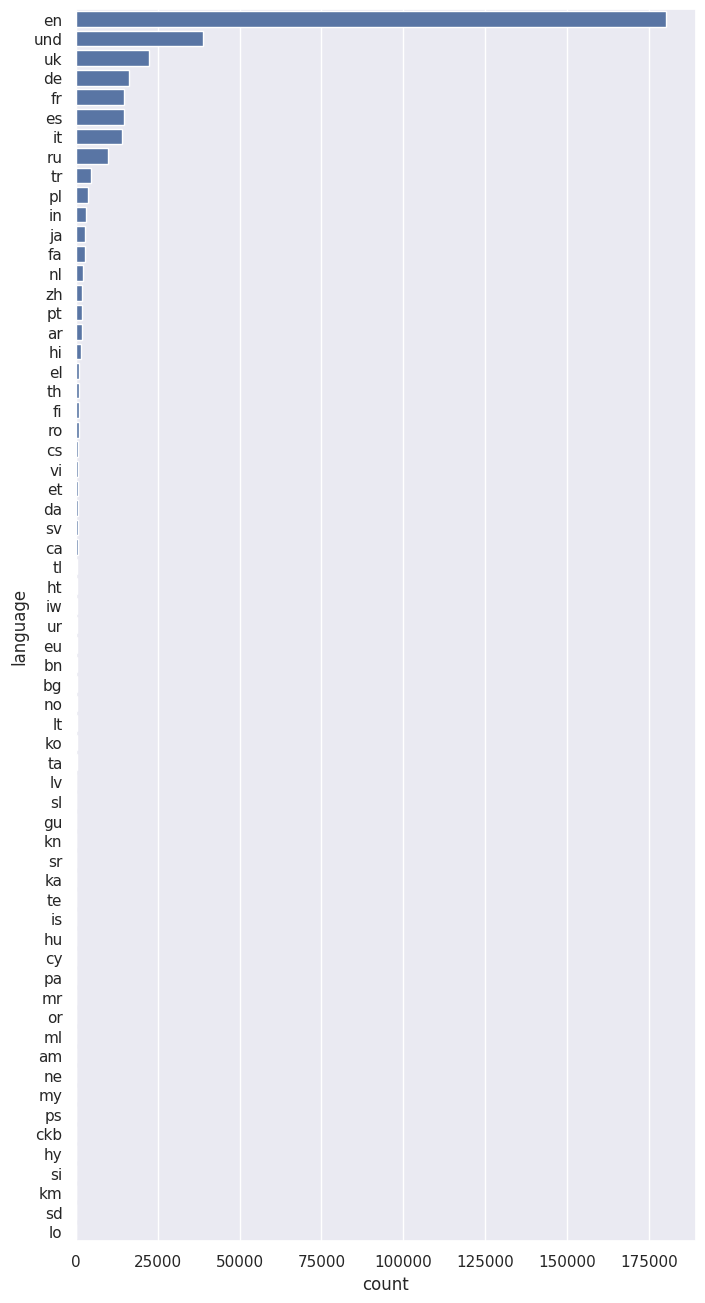

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig, ax = plt.subplots(figsize=(8,16))
order = du['language'].value_counts().index
sns.countplot(du, y="language", ax=ax, orient='h', order=order)

In [ ]:
total_samples2 = du.shape[0]
n_en_samples2 = du.language.value_counts()['en']
print(f'There are {n_en_samples2} samples in English, which corresponds to {(n_en_samples2/total_samples2)*100:.2f}% of all data')

There are 180228 samples in English, which corresponds to 51.27% of all data


In [ ]:
en_data2 = du[du.language == 'en'].copy()
en_data2[['language','text']]

language                                               text
0            en  The #UnitedStates’ decision to increase intere...
1            en                   0000: It's #midnight in the #UK.
2            en  Chantal Bellehumeur @c_bellehumeur Canadian Au...
3            en  Animal shelter Dogs and Cats, we need your hel...
4            en  The statement by the Russian Foreign Ministry ...
...         ...                                                ...
351548       en  Sabrina Carpenter Your Love's Like\nhttps://t....
351549       en  @U24_gov_ua Done. Brilliant initiative by @U24...
351552       en  @anders_aslund @POTUS No, but hopefully he wil...
351553       en  North Korea fires ballistic missile over Japan...
351554       en  NATO investigates reported Russian missiles in...

[180228 rows x 2 columns]

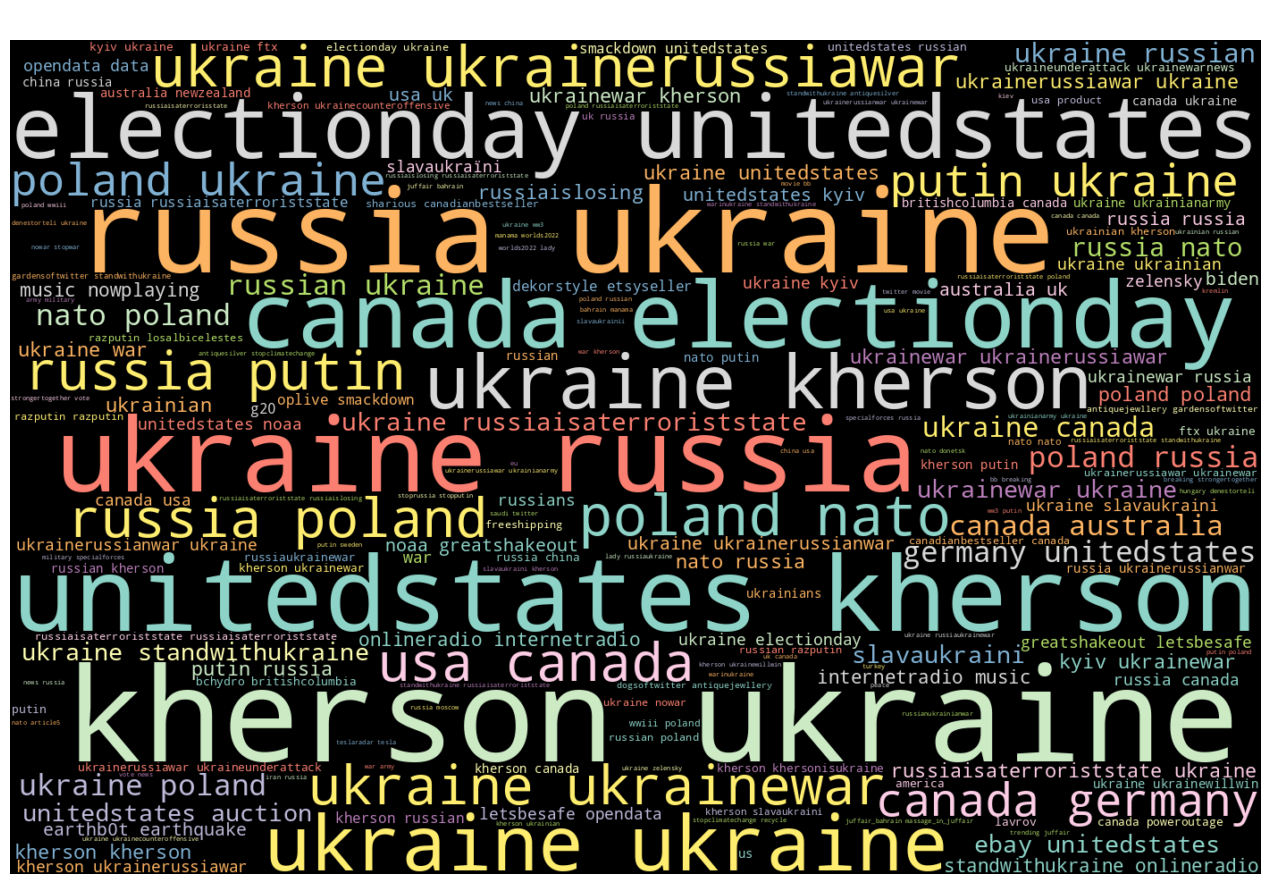

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Estrai gli hashtag
def extract_hashtags(text):
    return re.findall(r"#\w+", str(text).lower())

hashtags = en_data2["text"].dropna().apply(extract_hashtags)
all_hashtags = [tag for sublist in hashtags for tag in sublist]
text_for_cloud = " ".join(all_hashtags)

wordcloud = WordCloud(
    width=1400,
    height=933,
    background_color="black",
    colormap="Set3",  # palette colorata e vivace
    max_words=200,
    contour_width=0,
    prefer_horizontal=1.0,
    normalize_plurals=False
).generate(text_for_cloud)

# Mostra il risultato
plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud relativa ai tweet", fontsize=20, color='white')
plt.tight_layout()
plt.show()

In [ ]:
en_data2['extractedts'] = pd.to_datetime(en_data2['extractedts'])
en_data2['extractedts'] = en_data2['extractedts'].dt.floor('s')  # arrotonda al secondo
en_data2['extractedts']

0        2022-11-10 02:08:24
1        2022-11-10 02:57:03
2        2022-11-10 02:08:24
3        2022-11-10 05:24:13
4        2022-11-10 07:06:41
                 ...        
351548   2022-11-16 01:52:26
351549   2022-11-16 01:52:26
351552   2022-11-16 01:14:34
351553   2022-11-16 01:14:34
351554   2022-11-16 01:52:26
Name: extractedts, Length: 180228, dtype: datetime64[ns]

In [ ]:
import pandas as pd
import plotly.express as px

en_data2['extractedts'] = pd.to_datetime(en_data2['extractedts'])

# Aggrega ogni 5 minuti
tweets_per_minute = en_data2.groupby(en_data2['extractedts'].dt.floor('30min')).size().reset_index(name='tweet_count')
tweets_per_minute.columns = ['timestamp', 'tweet_count']

fig = px.line(
    tweets_per_minute,
    x='timestamp',
    y='tweet_count',
    markers=True,
    title="Numero di tweet ogni 30 minuti",
    labels={'timestamp': 'Timestamp', 'tweet_count': 'Numero di tweet'}
)

fig.update_layout(
    xaxis=dict(
        tickformat='%Y-%m-%d %H:%M',
        tickangle=45,
        nticks=20,
        title='Timestamp'
    ),
    yaxis_title='Numero di nuovi tweet',
    template='plotly_white',
    title_font_size=18
)

fig.show()


In [ ]:
import pandas as pd

# 🔍 Controlla e mostra quanti duplicati ci sono nella colonna 'text'
n_duplicates2 = en_data2.duplicated(subset="text").sum()
print(f"🔍 Trovati {n_duplicates2} duplicati nella colonna 'text'.")

# ✅ Rimuove i duplicati mantenendo solo la prima occorrenza
en_data2_cleaned = en_data2.drop_duplicates(subset="text", keep="first").reset_index(drop=True)
print(f"✅ Dataset aggiornato. Nuove dimensioni: {en_data2_cleaned.shape}")

# (Opzionale) Sovrascrivi la variabile originale
en_data2 = en_data2_cleaned


🔍 Trovati 5744 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (174484, 29)


In [ ]:
!pip install clean-text
!pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=dc2586f7ef01294db3c3357be5865524df915f881c663064450dc6060bab3576
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 68.2 MB/s eta 0:00:00


In [ ]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi" , "binance"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):
    text = tag[1:]  # Rimuove #

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in WHITELIST or text.lower() in ENGLISH_WORDS:
        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)

def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

en_data2_cleaned["text"].apply(segment_hashtag_text)
debug_hashtag_segmentation(en_data2_cleaned, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [ ]:
# Segmenta gli hashtag nel testo
en_data2_cleaned["text"] = en_data2_cleaned["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
en_data2_cleaned["text"] = (
    en_data2_cleaned["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)


In [ ]:
en_data2_cleaned[['text', 'extractedts']]


text         extractedts
0       the united states decision to increase interes... 2022-11-10 02:08:24
1                             0000 its midnight in the uk 2022-11-10 02:57:03
2       chantal bellehumeur canadian author and noveli... 2022-11-10 02:08:24
3       animal shelter dogs and cats we need your help... 2022-11-10 05:24:13
4       the statement by the russian foreign ministry ... 2022-11-10 07:06:41
...                                                   ...                 ...
174479  sabrina carpenter your loves like sabrina carp... 2022-11-16 01:52:26
174480  done brilliant initiative by stand with ukrain... 2022-11-16 01:52:26
174481  no but hopefully he will ignore the advice of ... 2022-11-16 01:14:34
174482  north korea fires ballistic missile over japan... 2022-11-16 01:14:34
174483  nato investigates reported russian missiles in... 2022-11-16 01:52:26

[174484 rows x 2 columns]

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from bertopic import BERTopic
from tqdm import tqdm
import torch

# === Verifica GPU ===
if torch.cuda.is_available():
    print(f"✅ GPU disponibile: {torch.cuda.get_device_name(0)}")
    device = "cuda"
else:
    print("⚠️ Nessuna GPU disponibile. Si userà la CPU.")
    device = "cpu"

# === 1. Filtra i tweet ===
start_date = pd.to_datetime("2022-11-10")
end_date = pd.to_datetime("2022-11-13")
mask = (en_data2_cleaned['extractedts'] >= start_date) & (en_data2_cleaned['extractedts'] <= end_date)
df_day = en_data2_cleaned[mask].copy()

# === 2. Rinforza la parola "Kherson" ===
df_day["text"] = df_day["text"].astype(str).str.replace(r"(?i)\bkherson\b", "KHERSON", regex=True)

# === 3. Preprocessing con barra di avanzamento ===
print("📦 Preprocessing dei testi...")
texts = []
for text in tqdm(df_day["text"].dropna().astype(str), desc="Elaborazione tweet"):
    texts.append(text)

print(f"📊 Totale tweet analizzati: {len(texts)}")

# === 4. Embedding ===
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2", device=device)
embeddings = embedding_model.encode(texts, show_progress_bar=True, device=device)

# === 5. PCA + Scaling ===
print("⚙️ PCA + Scaling...")
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=10))
reduced_embeddings = pca_pipeline.fit_transform(embeddings)

# === 6. Clustering con KMeans ===
print("🔍 Clustering con KMeans...")
kmeans = KMeans(n_clusters=20, random_state=42)
clusters = kmeans.fit_predict(reduced_embeddings)

# === 7. BERTopic con cluster definiti manualmente ===
print("🏷️ Creazione modello BERTopic...")
topic_model = BERTopic(embedding_model=embedding_model, min_topic_size=50)
topics, _ = topic_model.fit_transform(texts, reduced_embeddings)
df_day["topic"] = topics

# === 8. Seleziona i 10 topic con più tweet ===
top_10 = df_day["topic"].value_counts().nlargest(10).index.tolist()
df_day_top = df_day[df_day["topic"].isin(top_10)]

# === 9. Riepilogo finale solo per i top 10 topic ===
print("\n=== RIEPILOGO TOPIC (Top 10 per frequenza) ===")
topic_info = topic_model.get_topic_info()
topic_info_top10 = topic_info[topic_info["Topic"].isin(top_10)]
print(topic_info_top10)

# === 10. Tweet per ciascuno dei 10 topic principali ===
print("\n=== ESEMPI DI TWEET PER I TOP 10 TOPIC ===")
for topic_id in sorted(top_10):
    print(f"\n🔹 TOPIC {topic_id} — {topic_model.get_topic(topic_id)}")
    tweets = df_day_top[df_day_top["topic"] == topic_id]["text"].dropna().tolist()
    num_to_show = min(len(tweets), 5)
    if num_to_show == 0:
        print("(Nessun tweet disponibile)")
    else:
        print(f"\nEsempi di tweet (max 5):")
        for i in range(num_to_show):
            print(f" - {tweets[i]}")










✅ GPU disponibile: Tesla T4
📦 Preprocessing dei testi...


Elaborazione tweet: 100%|██████████| 75514/75514 [00:00<00:00, 1479452.89it/s]

📊 Totale tweet analizzati: 75514


Batches:   0%|          | 0/2360 [00:00<?, ?it/s]

⚙️ PCA + Scaling...
🔍 Clustering con KMeans...
🏷️ Creazione modello BERTopic...

=== RIEPILOGO TOPIC (Top 10 per frequenza) ===
   Topic  Count                                Name  \
0     -1  15613     -1_canada_united_states_kherson   
1      0  45597             0_ukraine_russia_the_of   
2      1   3158        1_election_day_2022_midterms   
3      2   2279          2_canada_cdn_poli_canadian   
4      3    492  3_canada_newfoundland_shipping_ous   
5      4    480           4_missile_military_the_us   
6      5    457        5_remembrance_forget_lest_we   
7      6    440              6_raz_hot_time_celeste   
8      7    438      7_drone_election_states_united   
9      8    417   8_essay_homework_class_assignment   

                                      Representation  \
0  [canada, united, states, kherson, the, in, chi...   
1  [ukraine, russia, the, of, war, is, to, russia...   
2  [election, day, 2022, midterms, vote, election...   
3  [canada, cdn, poli, canadian, toronto, 

In [ ]:
# === 7.1 Salva i tweet con topic assegnato ===
df_day.to_csv("tweet_con_topic.csv", index=False, encoding="utf-8")
print("💾 Salvato: tweet_con_topic.csv")

# === 7.2 Salva il riepilogo dei topic ===
topic_info = topic_model.get_topic_info()
topic_info.to_csv("riepilogo_topic.csv", index=False, encoding="utf-8")
print("📊 Salvato: riepilogo_topic.csv")


💾 Salvato: tweet_con_topic.csv
📊 Salvato: riepilogo_topic.csv


In [ ]:
# 8. === Visualizzazioni ===
# Mappa interattiva dei topic
topic_model.visualize_topics().show()

df_day["timestamp"] = df_day["extractedts"]

df_day["timestamp"] = df_day["extractedts"]

# 1. Calcola topics over time (senza usare keyword!)
topics_over_time = topic_model.topics_over_time(
    df_day["text"].tolist(),
    df_day["timestamp"].tolist()
)

# 2. Visualizzazione interattiva
fig = topic_model.visualize_topics_over_time(topics_over_time)
fig.show()

2025-06-08 19:07:46,395 - BERTopic - WARNING: There are more than 100 unique timestamps (i.e., 6347) which significantly slows down the application. Consider setting `nr_bins` to a value lower than 100 to speed up calculation. 


KeyboardInterrupt: 

In [ ]:
from transformers import pipeline

# Pipeline di classificazione emozionale
emotion_model = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Funzione per ottenere emozione dominante
def extract_emotion(text):
    try:
        scores = emotion_model(text[:512])[0]  # Troncamento per sicurezza
        top_emotion = max(scores, key=lambda x: x['score'])
        return top_emotion['label'], round(top_emotion['score'], 3)
    except:
        return None, None

# Applica a ogni tweet
df_day[["emotion", "emotion_score"]] = df_day["text"].apply(
    lambda x: pd.Series(extract_emotion(x))
)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
# Colonne effettivamente presenti
columns_to_save = [
    "extractedts", "text", "topic", "emotion", "emotion_score"
]

# Salva in CSV
df_day[columns_to_save].to_csv("tweet_topic_emotionLiberazione.csv", index=False)

print("✅ Risultati salvati nel file: tweet_topic_emotion.csv")

✅ Risultati salvati nel file: tweet_topic_emotion.csv


In [ ]:
import plotly.express as px

# Conta i tweet per coppia (topic, emozione)
emotion_topic = df_day.groupby(["topic", "emotion"]).size().reset_index(name="count")

# Seleziona i primi 10 topic più frequenti
top_10_topics = df_day["topic"].value_counts().nlargest(10).index.tolist()

# Filtra i dati solo per questi topic
emotion_topic_top10 = emotion_topic[emotion_topic["topic"].isin(top_10_topics)]

# Crea grafico stacked bar interattivo
fig = px.bar(
    emotion_topic_top10,
    x="topic",
    y="count",
    color="emotion",
    title="Distribuzione emozionale per i Top 10 Topic",
    labels={"count": "Numero di tweet", "topic": "Topic", "emotion": "Emozione"},
)

fig.update_layout(
    barmode="stack",
    xaxis_type="category",
    template="plotly_white",
    legend_title="Emozione"
)

fig.show()


In [ ]:
import plotly.express as px

# Conta il numero di tweet per emozione
emotion_counts = df_day["emotion"].value_counts().reset_index()
emotion_counts.columns = ["emotion", "tweet_count"]

# Crea il grafico interattivo
fig = px.bar(
    emotion_counts,
    x="emotion",
    y="tweet_count",
    color="emotion",
    title="Distribuzione delle emozioni nei tweet",
    labels={"emotion": "Emozione", "tweet_count": "Numero di tweet"},
)

fig.update_layout(
    xaxis_tickangle=-45,
    template="plotly_white"
)

fig.show()

**FINE LIBERAZIONE**

INIZIO ANALISI SU CONFLITTO ISRAELE-PALESTINA. I DATASET IN RETE RISULTANO AVERE SOLO TWEETS DAL 17 OTTOBRE 2023 AL 17 DICEMBRE 2023

# LA PRIMA ANALISI SARA' SUL DATASET GENERALE SENZA FILTRO SU NESSUN ACCADIMENTO SPECIFICO

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Tweets.csv to Tweets.csv


In [ ]:
import pandas as pd

ispal = pd.read_csv("Tweets.csv")
ispal.head()

id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                          date  likes  comments  
0   Nov 22, 2023 · 9:47 PM UTC      0         0  
1   Nov 22, 2023 · 3:27 PM UTC    443         9  
2    Oct 7, 2023 · 7:15 AM UTC      0         0  
3  Nov 23, 2023 · 11:12 AM UTC    381        44  
4   Nov 22, 2023 · 9:45 PM UTC      0         0

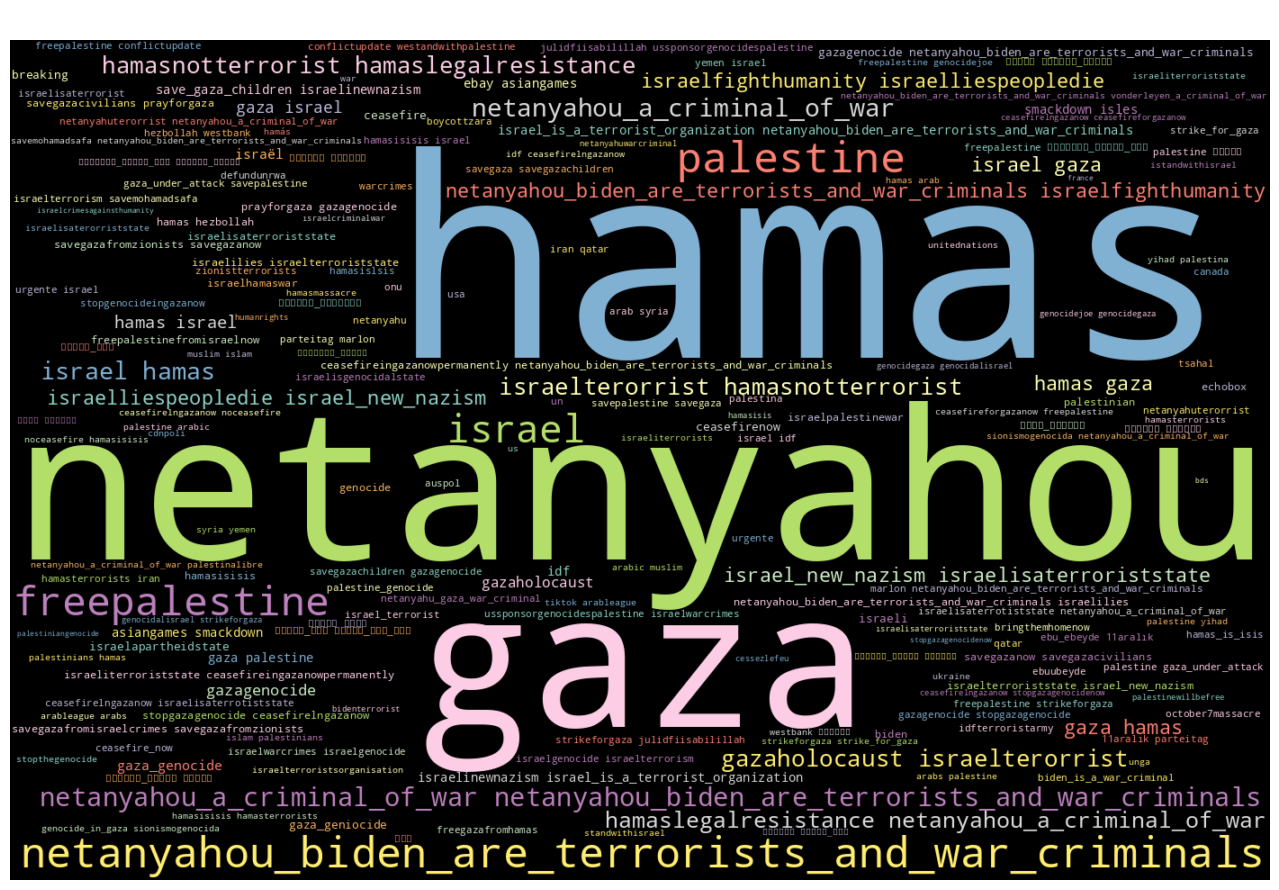

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Estrai gli hashtag
def extract_hashtags(text):
    return re.findall(r"#\w+", str(text).lower())

hashtags = ispal["text"].dropna().apply(extract_hashtags)
all_hashtags = [tag for sublist in hashtags for tag in sublist]
text_for_cloud = " ".join(all_hashtags)

wordcloud = WordCloud(
    width=1400,
    height=933,
    background_color="black",
    colormap="Set3",  # palette colorata e vivace
    max_words=200,
    contour_width=0,
    prefer_horizontal=1.0,
    normalize_plurals=False
).generate(text_for_cloud)

# Mostra il risultato
plt.figure(figsize=(14, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud relativa ai tweet", fontsize=20, color='white')
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd

# Pulisci la colonna 'date' e converti in datetime
ispal["parsed_date"] = (
    ispal["date"]
    .str.replace("·", "", regex=False)
    .str.replace("UTC", "", regex=False)
    .str.strip()
)

# Converte la stringa pulita in datetime
ispal["parsed_date"] = pd.to_datetime(ispal["parsed_date"])

# Visualizza le prime righe per conferma
print(ispal[["date", "parsed_date"]].head())

<ipython-input-5-fca2442c4c6b>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ispal["parsed_date"] = pd.to_datetime(ispal["parsed_date"])


                          date         parsed_date
0   Nov 22, 2023 · 9:47 PM UTC 2023-11-22 21:47:00
1   Nov 22, 2023 · 3:27 PM UTC 2023-11-22 15:27:00
2    Oct 7, 2023 · 7:15 AM UTC 2023-10-07 07:15:00
3  Nov 23, 2023 · 11:12 AM UTC 2023-11-23 11:12:00
4   Nov 22, 2023 · 9:45 PM UTC 2023-11-22 21:45:00


In [ ]:
ispal[['parsed_date', 'text']]



parsed_date                                               text
0     2023-11-22 21:47:00  A statement from psychoanalytic activists:  Th...
1     2023-11-22 15:27:00                        bak bak bak bak doyamadınız
2     2023-10-07 07:15:00  Check out 🏒 35 + different ERIK KARLSSON cards...
3     2023-11-23 11:12:00  Il s'en passe des trucs pendant qu'on vous ori...
4     2023-11-22 21:45:00  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...
...                   ...                                                ...
15493 2023-12-13 00:46:00                The Hamas terrorists are pure evil.
15494 2023-12-12 03:20:00  İngiliz Çocuklardan, Filistin'e Destek Mesajla...
15495 2023-12-13 00:47:00  Has Hamas' leadership stated it would abide by...
15496 2023-12-13 01:41:00  Israel's UN representative Erdan holds up Hama...
15497 2023-12-12 15:32:00  İsrail Hamas 'ı vurmaya devam ettiğini söyledi...

[15498 rows x 2 columns]

In [ ]:
import pandas as pd

# 🔍 Controlla e mostra quanti duplicati ci sono nella colonna 'text'
n_duplicatesPalestina = ispal.duplicated(subset="text").sum()
print(f"🔍 Trovati {n_duplicatesPalestina} duplicati nella colonna 'text'.")

# ✅ Rimuove i duplicati mantenendo solo la prima occorrenza
ispal_cleaned = ispal.drop_duplicates(subset="text", keep="first").reset_index(drop=True)
print(f"✅ Dataset aggiornato. Nuove dimensioni: {ispal_cleaned.shape}")

# (Opzionale) Sovrascrivi la variabile originale
ispal = ispal_cleaned


🔍 Trovati 644 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (14854, 7)


In [ ]:
!pip install clean-text
!pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=af8ff115cf6d7464ed6b0eb4cccadb34e861db0cbedfcaa20e7c5cf829344618
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.4 MB/s eta 0:00:00


In [ ]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

HARD_WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi", "binance", "idf", "hamas", "gaza", "jerusalem", "telaviv", "ramallah", "vs"
}

SOFT_WHITELIST = {
    "freepalestine", "standwithisrael", "prayforgaza", "fromtherivertothesea",
    "gazaunderattack", "savegaza", "zionistapartheid", "israelgenocide"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):

    text = tag[1:]  # Rimuove #

    # === Hard whitelist: mai segmentare ===
    if text.lower() in HARD_WHITELIST:
        return '#' + text.lower()

    # === Soft whitelist: segmenta se possibile ===
    if text.lower() in SOFT_WHITELIST:
        return '#' + ' '.join(segment(text.lower()))

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in HARD_WHITELIST or text.lower() in ENGLISH_WORDS:

        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in HARD_WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    if not isinstance(text, str):
        return ""  # oppure `return text` se preferisci lasciare inalterati i non-stringa
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)


def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

ispal_cleaned["text"] = ispal_cleaned["text"].fillna("").astype(str).apply(segment_hashtag_text)
debug_hashtag_segmentation(ispal_cleaned, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



🔎 Tweet 2:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles

🔎 Tweet 3:
    #veto ➜ #veto

🔎 Tweet 5:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza
    #idf ➜ #idf
    #hamas ➜ #hamas
    #hezbollah ➜ #hezbollah
    #west ➜ #west
    #jihad ➜ #jihad
    #iran ➜ #iran
    #palestine ➜ #palestine

🔎 Tweet 14:
    #hamas ➜ #hamas
    #palestine ➜ #palestine
    #palestine ➜ #palestine

🔎 Tweet 15:
    #israel ➜ #israel
    #israel ➜ #israel

🔎 Tweet 19:
    #hamas ➜ #hamas
    #israel ➜ #israel

🔎 Tweet 34:
    #free ➜ #free
    #israel ➜ #israel
    #war ➜ #war

🔎 Tweet 35:
    #gaza ➜ #gaza
    #huj ➜ #huj

🔎 Tweet 39:
    #hamas ➜ #hamas
    #arras ➜ #arras

🔎 Tweet 40:
    #ryan ➜ #ryan
    #num ➜ #num

🔎 Tweet 45:
    #gaza ➜ #gaza

🔎 Tweet 46:
    #icy ➜ #icy

🔎 Tweet 47:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza

🔎 Tweet 49:
    #gaza ➜ #gaza

🔎 Tweet 55:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles


In [ ]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [ ]:
# Segmenta gli hashtag nel testo
ispal_cleaned["text"] = ispal_cleaned["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
ispal_cleaned["text"] = (
    ispal_cleaned["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)

In [ ]:
ispal_cleaned[['parsed_date', 'text']]


parsed_date                                               text
0     2023-11-22 21:47:00  a statement from psychoanalytic activists the ...
1     2023-11-22 15:27:00                          bak bak bak bak doyamadnz
2     2023-10-07 07:15:00  check out 35 + different erik karlsson cards l...
3     2023-11-23 11:12:00  il sen passe des trucs pendant quon vous orien...
4     2023-11-22 21:45:00  aw okay well thats cool im sure pal will appre...
...                   ...                                                ...
14849 2023-12-13 00:46:00                 the hamas terrorists are pure evil
14850 2023-12-12 03:20:00  ingiliz cocuklardan filistine destek mesajlar ...
14851 2023-12-13 00:47:00  has hamas leadership stated it would abide by ...
14852 2023-12-13 01:41:00  israels un representative erdan holds up hamas...
14853 2023-12-12 15:32:00  israil hamas vurmaya devam ettigini soyledi as...

[14854 rows x 2 columns]

In [ ]:
import pandas as pd

# === 1. Lista entità rilevanti per il conflitto Israele–Palestina ===
known_entities = {
    # Luoghi
    "israel", "palestine", "gaza", "jerusalem", "lebanon", "syria", "egypt", "qatar", "jordan", "west bank",

    # Leader e persone
    "netanyahu", "biden", "erdogan", "abbas", "nasrallah", "sisi", "smotrich", "ben gvir", "gilad", "erdan",

    # Organizzazioni e gruppi
    "hamas", "idf", "hezbollah", "islamic jihad", "fatah", "mossad", "un", "unrwa", "unga",
    "united nations", "palestinian authority", "red crescent", "unhcr",

    # Combinazioni frequenti
    "hamas israel", "israel hamas", "gaza israel", "gaza hamas", "hamas gaza", "palestine gaza", "idf spokesperson",
    "tunnels de hamas", "israel gaza", "israel palestine", "free palestine", "stand with israel", "ceasefire now","genocide",

    # Altre entità segnalate
    "united states", "al jazeera", "hamas university"
}

# === 2. Mappa personalizzata per sigle e capitalizzazione precisa ===
entity_map = {
    "idf": "IDF",
    "usa": "USA",
    "unrwa": "UNRWA",
    "unga": "UNGA",
    "unhcr": "UNHCR",
    "mossad": "Mossad",
    "al jazeera": "Al Jazeera",
    "united nations": "United Nations",
    "united states": "United States",
    "palestinian authority": "Palestinian Authority",
    "red crescent": "Red Crescent",
    "hamas university": "Hamas University"
}




In [ ]:
# === 3. Funzione per capitalizzare correttamente entità note ===
def smart_capitalize(text, known_entities, entity_map):
    if not isinstance(text, str):
        return text
    for phrase in sorted(known_entities, key=len, reverse=True):  # più lunghe prima
        replacement = entity_map.get(phrase.lower(), phrase.title())
        text = text.replace(phrase.lower(), replacement)
    return text

In [ ]:
# === 4. Applicazione su ispal_cleaned["text"] ===
ispal_cleaned["text"] = ispal_cleaned["text"].apply(
    lambda t: smart_capitalize(t, known_entities, entity_map)
)

In [ ]:
ispal_cleaned[['parsed_date', 'text']]


parsed_date                                               text
0     2023-11-22 21:47:00  a statement from psychoanalytic activists the ...
1     2023-11-22 15:27:00                          bak bak bak bak doyamadnz
2     2023-10-07 07:15:00  check out 35 + different erik karlsson cards l...
3     2023-11-23 11:12:00  il sen passe des trucs pendant quon vous orien...
4     2023-11-22 21:45:00  aw okay well thats cool im sure pal will appre...
...                   ...                                                ...
14849 2023-12-13 00:46:00                 the Hamas terrorists are pure evil
14850 2023-12-12 03:20:00  ingiliz cocuklardan filistine destek mesajlar ...
14851 2023-12-13 00:47:00  has Hamas leadership stated it would abide by ...
14852 2023-12-13 01:41:00  Israels Un representative Erdan holds up Hamas...
14853 2023-12-12 15:32:00  israil Hamas vurmaya devam ettigini soyledi as...

[14854 rows x 2 columns]

In [ ]:
# ✅ Salvataggio su CSV
ispal_cleaned.to_csv("verifica.csv", index=False)
print("✅ File salvato")

✅ File salvato


DOPO PRE PROCESSING DELLA COLONNA TEXT E DELLA DATA INIZIO CON ANALISI VERA E PROPRIA

NER

In [ ]:
# 📦 Importazioni
from transformers import pipeline
import pandas as pd
import torch

# === 1. Configura modello e device
model_name = "Davlan/bert-base-multilingual-cased-ner-hrl"
device = 0 if torch.cuda.is_available() else -1
print(f"🔧 Device: {'GPU' if device == 0 else 'CPU'}")

# === 2. Crea la pipeline con aggregazione automatica delle entità
ner_pipeline = pipeline("ner", model=model_name, tokenizer=model_name, aggregation_strategy="simple", device=device)

# === 3. Dati: testi già puliti
texts = ispal_cleaned["text"].fillna("").astype(str).tolist()

# === 4. Estrai entità direttamente dalla pipeline
ner_results = []
for text in texts:
    try:
        entities = ner_pipeline(text)
        for ent in entities:
            ner_results.append((ent["word"], ent["entity_group"], round(ent["score"], 3)))
    except Exception:
        continue

# === 5. Crea DataFrame e salva risultati
ner_df = pd.DataFrame(ner_results, columns=["Entity", "Label", "Score"])
summary_df = (
    ner_df.groupby(["Entity", "Label"])
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

# === 6. Esporta e stampa risultati
summary_df.to_csv("ner_summary_davlan_simple.csv", index=False)
print("✅ File salvato come ner_summary_davlan_simple.csv")
print(summary_df.head(20).to_string(index=False))






🔧 Device: GPU


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


✅ File salvato come ner_summary_davlan_simple.csv
        Entity Label  Count
         Hamas   ORG  12168
        Israel   LOC   5600
          Gaza   LOC   3199
     Palestine   LOC   1166
           IDF   ORG    621
         Biden   PER    344
     Netanyahu   PER    307
         Qatar   LOC    263
Free Palestine   LOC    178
        Israel   ORG    163
     West Bank   LOC    135
     Hezbollah   ORG    133
         UNRWA   ORG     95
    netanyahou   PER     93
            Un   ORG     72
         Egypt   LOC     68
     Jerusalem   LOC     68
       Lebanon   LOC     66
            Bi   PER     64
United Nations   ORG     63


## **Analisi di Co-occorrenza**

**Obiettivo:** scoprire se alcune parole appaiono *insieme* nello stesso tweet (non consecutivamente)

In [ ]:
from itertools import combinations
from collections import Counter
import pandas as pd

# === 1. Riorganizza entità per ogni testo
# Crea una lista di set di entità per ogni documento (per evitare duplicati nello stesso tweet)
entities_per_text = []

idx = 0
for text in texts:
    try:
        entities = ner_pipeline(text)
        # Rimuove duplicati nel singolo testo e normalizza (es. strip)
        entity_words = set(ent["word"].strip() for ent in entities if len(ent["word"].strip()) > 2)
        entities_per_text.append(entity_words)
    except:
        continue

# === 2. Estrai tutte le combinazioni di coppie di entità co-occorse nello stesso testo
pair_counter = Counter()

for entity_set in entities_per_text:
    if len(entity_set) >= 2:
        pairs = combinations(sorted(entity_set), 2)
        pair_counter.update(pairs)

# === 3. Crea DataFrame e visualizza
cooccurrence_df = pd.DataFrame(pair_counter.most_common(50), columns=["Entity_Pair", "Count"])
cooccurrence_df[["Entity1", "Entity2"]] = pd.DataFrame(cooccurrence_df["Entity_Pair"].tolist(), index=cooccurrence_df.index)
cooccurrence_df.drop(columns=["Entity_Pair"], inplace=True)

# === 4. Salva su CSV e mostra top co-occorrenze
cooccurrence_df.to_csv("ner_entity_cooccurrence.csv", index=False)
print("✅ Co-occorrenze salvate in ner_entity_cooccurrence.csv")
cooccurrence_df.head(20)


✅ Co-occorrenze salvate in ner_entity_cooccurrence.csv


Count         Entity1    Entity2
0    2720           Hamas     Israel
1    1694            Gaza      Hamas
2    1212            Gaza     Israel
3     463           Hamas        IDF
4     366          Israel  Palestine
5     364           Hamas  Palestine
6     264            Gaza  Palestine
7     216           Hamas      Qatar
8     179           Hamas  Netanyahu
9     172            Gaza        IDF
10    161             IDF     Israel
11    137           Biden      Hamas
12    119           Biden     Israel
13    113          Israel  Netanyahu
14    108           Biden       Gaza
15    100           Hamas  West Bank
16     94           Hamas  Hezbollah
17     85            Gaza  Netanyahu
18     77  Free Palestine     Israel
19     70  Free Palestine      Hamas

In [ ]:
import plotly.express as px

# ✅ Prendi le prime 20 co-occorrenze
top_pairs = cooccurrence_df.head(20).copy()
top_pairs["Label"] = top_pairs["Entity1"] + " - " + top_pairs["Entity2"]

# ✅ Crea grafico interattivo a barre orizzontali con colori più visibili
fig = px.bar(
    top_pairs,
    x="Count",
    y="Label",
    orientation="h",
    title="🔍 Top 20 Co-occorrenze di Entità Nominative (NER)",
    labels={"Count": "Frequenza", "Label": "Coppia di Entità"},
    color="Count",
    color_continuous_scale="Turbo",  # alternative: "Viridis", "Plasma", "Inferno"
)

# ✅ Migliora layout
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    margin=dict(l=120, r=40, t=60, b=40),
    height=600
)

# ✅ Mostra
fig.show()




SENTIMENT SULLE CO-OCCORRENZE NER SULL'INTERO DATASET


In [ ]:
from itertools import combinations
from collections import defaultdict
from transformers import pipeline
import pandas as pd
import torch

# === 1. Setup pipeline per il sentiment
device = 0 if torch.cuda.is_available() else -1
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=device)

# === 2. Etichette leggibili
label_mapping = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

# === 3. Inizializza raccolta
entities_per_text = []
sentiments = []

# === 4. Estrai entità e sentiment da ogni testo
for text in texts:
    try:
        entities = ner_pipeline(text)
        entity_words = set(ent["word"].strip() for ent in entities if len(ent["word"].strip()) > 2)
        if len(entity_words) < 2:
            continue
        sentiment_label = sentiment_pipeline(text[:512])[0]["label"]
        sentiment = label_mapping[sentiment_label]
        entities_per_text.append((entity_words, sentiment))
    except Exception:
        continue

# === 5. Conta le co-occorrenze e sentiment associati
pair_sentiment_stats = defaultdict(lambda: {"POSITIVE": 0, "NEUTRAL": 0, "NEGATIVE": 0})

for entity_set, sentiment in entities_per_text:
    for e1, e2 in combinations(sorted(entity_set), 2):
        key = f"{e1} - {e2}"
        pair_sentiment_stats[key][sentiment] += 1

# === 6. Crea DataFrame
rows = []
for pair, counts in pair_sentiment_stats.items():
    total = sum(counts.values())
    e1, e2 = pair.split(" - ")
    rows.append({
        "Entity1": e1,
        "Entity2": e2,
        "POSITIVE": counts["POSITIVE"],
        "NEUTRAL": counts["NEUTRAL"],
        "NEGATIVE": counts["NEGATIVE"],
        "Total": total
    })

sentiment_df = pd.DataFrame(rows).sort_values("Total", ascending=False)

# === 7. Esporta e mostra
sentiment_df.to_csv("ner_entity_sentiment_cooccurrence.csv", index=False)
print("✅ File salvato come ner_entity_sentiment_cooccurrence.csv")
print(sentiment_df[["Entity1", "Entity2", "POSITIVE", "NEUTRAL", "NEGATIVE", "Total"]].head(20).to_string(index=False))




Device set to use cuda:0


✅ File salvato come ner_entity_sentiment_cooccurrence.csv
       Entity1   Entity2  POSITIVE  NEUTRAL  NEGATIVE  Total
         Hamas    Israel        20      911      1789   2720
          Gaza     Hamas        12      682      1000   1694
          Gaza    Israel         5      456       751   1212
         Hamas       IDF         8      116       339    463
        Israel Palestine         3      115       248    366
         Hamas Palestine         5       97       262    364
          Gaza Palestine         3       96       165    264
         Hamas     Qatar         0      116       100    216
         Hamas Netanyahu         0       62       117    179
          Gaza       IDF         4       53       115    172
           IDF    Israel         1       45       115    161
         Biden     Hamas         2       41        94    137
         Biden    Israel         0       34        85    119
        Israel Netanyahu         0       49        64    113
         Biden      Gaza   

In [ ]:
import plotly.graph_objects as go

# Filtra le 15 coppie con il numero totale più alto di co-occorrenze
top_df = sentiment_df.nlargest(15, "Total")

# Crea il grafico interattivo a barre impilate
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_df["Entity1"] + " & " + top_df["Entity2"],
    y=top_df["POSITIVE"],
    name="Positive",
    marker_color="seagreen"
))

fig.add_trace(go.Bar(
    x=top_df["Entity1"] + " & " + top_df["Entity2"],
    y=top_df["NEUTRAL"],
    name="Neutral",
    marker_color="gold"
))

fig.add_trace(go.Bar(
    x=top_df["Entity1"] + " & " + top_df["Entity2"],
    y=top_df["NEGATIVE"],
    name="Negative",
    marker_color="indianred"
))

# Personalizzazione del layout
fig.update_layout(
    barmode="stack",
    title="Top 15 Entity Co-occurrences by Sentiment",
    xaxis_title="Entity Pairs",
    yaxis_title="Tweet Count",
    legend_title="Sentiment",
    template="plotly_white",
    xaxis_tickangle=-45,
    height=600
)

fig.show()


**STESSO PROCEDIMENTO MA VERRA' FATTO UN FILTRO RELATIVO AD UN AVVENIMENTO PARTICOLARE.**\
 Tentativi di tregua e scambi di prigionieri (22 novembre–inizio dicembre)\
Tra il 22 e il 30 Novembre, si susseguono tregue parziali: scambio di ostaggi (150 palestinesi e 50 israeliani), sospensione parziale dei bombardamenti, ingresso di aiuti umanitari \
Il 1° dicembre, la tregua scade; Israele ricomincia i bombardamenti e invade Khan Younis con una massiccia offensiva via terra e aria.\
**PERIODO USATO PER STUDIO 15 NOVEMBRE 15 DICEMBRE**

In [ ]:
import pandas as pd



# Filtra i tweet tra il 10 e il 14 novembre 2023 (inclusi)
start_date = pd.to_datetime("2023-11-15")
end_date = pd.to_datetime("2023-12-15")

tweets_nov10_14 = ispal_cleaned[
    (ispal_cleaned["parsed_date"] >= start_date) &
    (ispal_cleaned["parsed_date"] <= end_date)
].copy()

print(f"✅ Tweet trovati: {len(tweets_nov10_14)}")


✅ Tweet trovati: 14661


IL TESTO E' STATO GIA' PREPROCESSATO PRECENDEMENTE

In [ ]:
tweets_nov10_14[['parsed_date', 'text']]


parsed_date                                               text
0     2023-11-22 21:47:00  a statement from psychoanalytic activists the ...
1     2023-11-22 15:27:00                          bak bak bak bak doyamadnz
3     2023-11-23 11:12:00  il sen passe des trucs pendant quon vous orien...
4     2023-11-22 21:45:00  aw okay well thats cool im sure pal will appre...
5     2023-11-23 01:39:00  Una ciudad debajo de Un hospital hospital alsh...
...                   ...                                                ...
14849 2023-12-13 00:46:00                 the Hamas terrorists are pure evil
14850 2023-12-12 03:20:00  ingiliz cocuklardan filistine destek mesajlar ...
14851 2023-12-13 00:47:00  has Hamas leadership stated it would abide by ...
14852 2023-12-13 01:41:00  Israels Un representative Erdan holds up Hamas...
14853 2023-12-12 15:32:00  israil Hamas vurmaya devam ettigini soyledi as...

[14661 rows x 2 columns]

NER RELATIVO AL PERIODO SELEZIONATO

In [ ]:
# 📦 Importazioni
from transformers import pipeline
import pandas as pd
import torch

# === 1. Configura modello e device
model_name = "Davlan/bert-base-multilingual-cased-ner-hrl"
device = 0 if torch.cuda.is_available() else -1
print(f"🔧 Device: {'GPU' if device == 0 else 'CPU'}")

# === 2. Crea la pipeline con aggregazione automatica delle entità
ner_pipeline = pipeline("ner", model=model_name, tokenizer=model_name, aggregation_strategy="simple", device=device)

# === 3. Dati: testi già puliti
texts = tweets_nov10_14["text"].fillna("").astype(str).tolist()

# === 4. Estrai entità direttamente dalla pipeline
ner_results = []
for text in texts:
    try:
        entities = ner_pipeline(text)
        for ent in entities:
            ner_results.append((ent["word"], ent["entity_group"], round(ent["score"], 3)))
    except Exception:
        continue

# === 5. Crea DataFrame e salva risultati
ner_df = pd.DataFrame(ner_results, columns=["Entity", "Label", "Score"])
summary_df = (
    ner_df.groupby(["Entity", "Label"])
    .size()
    .reset_index(name="Count")
    .sort_values("Count", ascending=False)
)

# === 6. Esporta e stampa risultati
summary_df.to_csv("ner_summary_davlan_simple104.csv", index=False)
print("✅ File salvato come ner_summary_davlan_simple.csv")
print(summary_df.head(20).to_string(index=False))

🔧 Device: GPU


Device set to use cuda:0


✅ File salvato come ner_summary_davlan_simple.csv
        Entity Label  Count
         Hamas   ORG  12026
        Israel   LOC   5501
          Gaza   LOC   3153
     Palestine   LOC   1137
           IDF   ORG    616
         Biden   PER    343
     Netanyahu   PER    303
         Qatar   LOC    253
Free Palestine   LOC    175
        Israel   ORG    163
     West Bank   LOC    133
     Hezbollah   ORG    128
         UNRWA   ORG     93
    netanyahou   PER     92
            Un   ORG     71
         Egypt   LOC     66
       Lebanon   LOC     66
            Bi   PER     64
     Jerusalem   LOC     63
United Nations   ORG     63


## **Analisi di Co-occorrenza**
relativa al periodo considerato


In [ ]:
from itertools import combinations
from collections import Counter
import pandas as pd

# === 1. Riorganizza entità per ogni testo
# Crea una lista di set di entità per ogni documento (per evitare duplicati nello stesso tweet)
entities_per_text = []

idx = 0
for text in texts:
    try:
        entities = ner_pipeline(text)
        # Rimuove duplicati nel singolo testo e normalizza (es. strip)
        entity_words = set(ent["word"].strip() for ent in entities if len(ent["word"].strip()) > 2)
        entities_per_text.append(entity_words)
    except:
        continue

# === 2. Estrai tutte le combinazioni di coppie di entità co-occorse nello stesso testo
pair_counter = Counter()

for entity_set in entities_per_text:
    if len(entity_set) >= 2:
        pairs = combinations(sorted(entity_set), 2)
        pair_counter.update(pairs)

# === 3. Crea DataFrame e visualizza
cooccurrence_df = pd.DataFrame(pair_counter.most_common(50), columns=["Entity_Pair", "Count"])
cooccurrence_df[["Entity1", "Entity2"]] = pd.DataFrame(cooccurrence_df["Entity_Pair"].tolist(), index=cooccurrence_df.index)
cooccurrence_df.drop(columns=["Entity_Pair"], inplace=True)

# === 4. Salva su CSV e mostra top co-occorrenze
cooccurrence_df.to_csv("ner_entity_cooccurrence.csv", index=False)
print("✅ Co-occorrenze salvate in ner_entity_cooccurrence.csv")
cooccurrence_df.head(20)

✅ Co-occorrenze salvate in ner_entity_cooccurrence.csv


Count         Entity1    Entity2
0    2678           Hamas     Israel
1    1666            Gaza      Hamas
2    1187            Gaza     Israel
3     460           Hamas        IDF
4     353           Hamas  Palestine
5     351          Israel  Palestine
6     253            Gaza  Palestine
7     211           Hamas      Qatar
8     177           Hamas  Netanyahu
9     171            Gaza        IDF
10    159             IDF     Israel
11    136           Biden      Hamas
12    118           Biden     Israel
13    112          Israel  Netanyahu
14    107           Biden       Gaza
15     98           Hamas  West Bank
16     91           Hamas  Hezbollah
17     84            Gaza  Netanyahu
18     76  Free Palestine     Israel
19     70  Free Palestine      Hamas

In [ ]:
import plotly.express as px

# ✅ Prendi le prime 20 co-occorrenze
top_pairs = cooccurrence_df.head(20).copy()
top_pairs["Label"] = top_pairs["Entity1"] + " - " + top_pairs["Entity2"]

# ✅ Crea grafico interattivo a barre orizzontali con colori più visibili
fig = px.bar(
    top_pairs,
    x="Count",
    y="Label",
    orientation="h",
    title="🔍 Top 20 Co-occorrenze di Entità Nominative (NER)",
    labels={"Count": "Frequenza", "Label": "Coppia di Entità"},
    color="Count",
    color_continuous_scale="Turbo",  # alternative: "Viridis", "Plasma", "Inferno"
)

# ✅ Migliora layout
fig.update_layout(
    yaxis=dict(autorange="reversed"),
    margin=dict(l=120, r=40, t=60, b=40),
    height=600
)

# ✅ Mostra
fig.show()

BIGRAM

In [ ]:
from itertools import groupby
from collections import Counter
import pandas as pd

# === 1. Estrai bigrammi ordinati dalle entità in ogni tweet
all_bigrams = []

for text in tweets_nov10_14["text"].fillna("").astype(str):
    try:
        entities = ner_pipeline(text)
        # Filtra entità con almeno 3 caratteri e rimuovi duplicati consecutivi
        entity_list = [ent["word"].strip() for ent in entities if len(ent["word"].strip()) > 2]
        entity_list = [k for k, _ in groupby(entity_list)]  # Elimina ripetizioni contigue

        if len(entity_list) >= 2:
            for i in range(len(entity_list) - 1):
                bigram = tuple(entity_list[i:i + 2])
                all_bigrams.append(bigram)
    except Exception:
        continue

# === 2. Conta e salva i bigrammi
counter = Counter(all_bigrams)
df = pd.DataFrame(counter.most_common(50), columns=["Bigram", "Count"])
df.to_csv("top_bigrams_entities_10_14nov.csv", index=False)

# === 3. Mostra i risultati principali
print("🔹 Top bigrammi:")
print(df.head(10).to_string(index=False))



🔹 Top bigrammi:
             Bigram  Count
    (Israel, Hamas)   1510
    (Hamas, Israel)   1399
      (Hamas, Gaza)    909
      (Gaza, Hamas)    773
     (Israel, Gaza)    599
     (Gaza, Israel)    450
       (IDF, Hamas)    245
       (Hamas, IDF)    209
(Israel, Palestine)    170
 (Palestine, Hamas)    151


In [ ]:
import pandas as pd
import plotly.express as px

# === Carica i bigrammi
df = pd.read_csv("top_2gram_entities_10_14nov.csv")

# === Prendi solo i primi 20
df = df.head(20)

# === Crea una colonna testuale formattata per l'etichetta del bigramma
df["Label"] = df["2-gram"].apply(lambda x: " ".join(x.strip("()").replace("'", "").split(", ")))

# === Grafico interattivo
fig = px.bar(
    df,
    x="Label",
    y="Count",
    title="🔹 Top 20 bigrammi di entità (10–14 novembre)",
    labels={"Label": "Bigramma", "Count": "Frequenza"},
    template="plotly_white",
    color="Count",
    color_continuous_scale="Bluered"
)

fig.update_traces(marker_line_color="black", marker_line_width=1.2)
fig.update_layout(xaxis_tickangle=-45, xaxis_title="Bigramma", yaxis_title="Frequenza")
fig.show()



SENTIMENT SUI BIGRAMMI

In [ ]:
from transformers import pipeline
from collections import defaultdict
import pandas as pd
import torch

# === 1. Carica bigrammi
top_bigrams_df = pd.read_csv("top_2gram_entities_10_14nov.csv")
top_bigrams_df["Bigram"] = top_bigrams_df["2-gram"].apply(lambda x: tuple(x.strip("()").replace("'", "").split(", ")))
top_bigrams = set(top_bigrams_df["Bigram"])

# === 2. Setup sentiment pipeline
device = 0 if torch.cuda.is_available() else -1
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=device)

# Mappa etichette
label_mapping = {
    "LABEL_0": "NEGATIVE",
    "LABEL_1": "NEUTRAL",
    "LABEL_2": "POSITIVE"
}

# === 3. Inizializza contatori
bigram_sentiment = defaultdict(lambda: {"POSITIVE": 0, "NEUTRAL": 0, "NEGATIVE": 0, "Total": 0})

# === 4. Analizza ogni tweet
for text in tweets_nov10_14["text"].fillna("").astype(str):
    try:
        # Estrai entità in ordine
        entities = ner_pipeline(text)
        entity_list = [ent["word"].strip() for ent in entities if len(ent["word"].strip()) > 2]

        # Rimuovi entità duplicate consecutive
        from itertools import groupby
        entity_list = [k for k, _ in groupby(entity_list)]

        # Estrai bigrammi reali nel tweet
        tweet_bigrams = [tuple(entity_list[i:i+2]) for i in range(len(entity_list)-1)]

        # Controlla se qualche bigramma del tweet è tra i top
        matching = [bg for bg in tweet_bigrams if bg in top_bigrams]
        if not matching:
            continue

        # Calcola sentiment del tweet
        sentiment_label = sentiment_pipeline(text[:512])[0]["label"]
        sentiment = label_mapping[sentiment_label]

        # Aggiorna i contatori
        for bg in matching:
            bigram_sentiment[bg][sentiment] += 1
            bigram_sentiment[bg]["Total"] += 1
    except:
        continue

# === 5. Crea DataFrame dei risultati
rows = []
for bg, counts in bigram_sentiment.items():
    rows.append({
        "Bigram": " - ".join(bg),
        "POSITIVE": counts["POSITIVE"],
        "NEUTRAL": counts["NEUTRAL"],
        "NEGATIVE": counts["NEGATIVE"],
        "Total": counts["Total"]
    })

sentiment_df = pd.DataFrame(rows).sort_values("Total", ascending=False)
sentiment_df.to_csv("bigram_sentiment_analysis.csv", index=False)
print("✅ Sentiment per bigrammi salvato in 'bigram_sentiment_analysis.csv'")
print(sentiment_df.head(20).to_string(index=False))


Device set to use cuda:0


✅ Sentiment per bigrammi salvato in 'bigram_sentiment_analysis.csv'
            Bigram  POSITIVE  NEUTRAL  NEGATIVE  Total
    Israel - Hamas        14      502       994   1510
    Hamas - Israel         5      397       997   1399
      Hamas - Gaza         7      361       541    909
      Gaza - Hamas         2      290       481    773
     Israel - Gaza         1      219       379    599
     Gaza - Israel         1      149       300    450
       IDF - Hamas         4       76       165    245
       Hamas - IDF         2       37       170    209
Israel - Palestine         1       51       118    170
 Palestine - Hamas         2       31       118    151
 Hamas - Palestine         3       35        95    133
     Hamas - Qatar         0       63        66    129
Palestine - Israel         1       39        82    122
  Palestine - Gaza         2       36        64    102
  Gaza - Palestine         3       31        64     98
     Qatar - Hamas         0       53        37     

In [ ]:
import pandas as pd
import plotly.express as px

# === 1. Carica i dati
df = pd.read_csv("bigram_sentiment_analysis.csv")

# === 2. Prendi solo i primi 20 bigrammi più frequenti
top_df = df.head(20)

# === 3. Prepara il DataFrame in formato long per stacked bar chart
long_df = top_df.melt(
    id_vars=["Bigram", "Total"],
    value_vars=["POSITIVE", "NEUTRAL", "NEGATIVE"],
    var_name="Sentiment",
    value_name="Count"
)

# === 4. Crea grafico interattivo stacked
fig = px.bar(
    long_df,
    x="Bigram",
    y="Count",
    color="Sentiment",
    title="📊 Sentiment dei Bigrammi più frequenti (10–14 novembre)",
    labels={"Count": "Frequenza", "Bigram": "Bigramma"},
    template="plotly_white",
    color_discrete_map={"POSITIVE": "green", "NEUTRAL": "gray", "NEGATIVE": "crimson"}
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Bigramma",
    yaxis_title="Conteggio",
    legend_title="Sentiment",
    barmode="stack"
)

fig.show()


SENTIMENT SULL'INTERO DATASET 10-14 APRILE

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# === 1. Inizializza pipeline emozioni
emotion_model = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

# === 2. Funzione per estrarre emozione dominante
def extract_emotion(text):
    try:
        scores = emotion_model(text[:512])[0]  # Troncamento per sicurezza
        top_emotion = max(scores, key=lambda x: x['score'])
        return pd.Series([top_emotion['label'], round(top_emotion['score'], 3)])
    except:
        return pd.Series([None, None])

# === 3. Applica con barra di avanzamento
tqdm.pandas(desc="🔍 Analisi emozionale")
tweets_nov10_14[["emotion", "emotion_score"]] = tweets_nov10_14["text"].progress_apply(extract_emotion)

# === 4. Salva risultati
tweets_nov10_14.to_csv("tweets_nov10_14_with_emotions.csv", index=False)
print("✅ Risultati salvati in 'tweets_nov10_14_with_emotions.csv'")

# === 5. Mostra distribuzione emozioni
emotion_counts = tweets_nov10_14["emotion"].value_counts().reset_index()
emotion_counts.columns = ["Emotion", "Count"]
print(emotion_counts)


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


🔍 Analisi emozionale: 100%|██████████| 14661/14661 [01:28<00:00, 166.23it/s]

✅ Risultati salvati in 'tweets_nov10_14_with_emotions.csv'
    Emotion  Count
0     anger   5467
1   neutral   3805
2      fear   2509
3   sadness   1018
4       joy    751
5   disgust    610
6  surprise    501


In [ ]:
import plotly.express as px
import pandas as pd

# === Carica i dati se necessario
# tweets_nov10_14 = pd.read_csv("tweets_nov10_14_with_emotions.csv")

# === Conta le emozioni
emotion_counts = tweets_nov10_14["emotion"].value_counts().reset_index()
emotion_counts.columns = ["Emotion", "Count"]

# === Grafico interattivo
fig = px.bar(
    emotion_counts,
    x="Emotion",
    y="Count",
    title="Distribuzione delle Emozioni nei Tweet (10–14 Novembre 2023)",
    color="Count",
    color_continuous_scale="Sunsetdark",
    template="plotly_white"
)

fig.update_layout(
    xaxis_title="Emozione",
    yaxis_title="Numero di Tweet",
    xaxis_tickangle=-45
)

fig.show()


E' STATO FATTO UN SAMPLING PRENDENDO IL 5% DI 10 FILE CSV RELATIVI ALLA GUERRA UKRAINO-RUSSIA FINO AD ARRIVARE A 14998, LO STESSO VALORE RELATIVO ALLA GUERRA PALESTINA-ISRAELE ALLO SCOPO DI EFFETTUARE UN CONFRONTO SULLE DUE GUERRE.

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [ ]:
import pandas as pd

russia = pd.read_csv("russiaEn.csv")
russia.head()

Unnamed: 0               userid         username  \
0       13352  1151666277036859392  SilviaTriWahyu2   
1      166816  1348737457483776000        ElectSaud   
2      177850  1601914392555261952  TheGreyPatriot_   
3      106491  1548886532307570694    FireaPapapig9   
4      170789  1431294506452783105         mhikaric   

                                            acctdesc                location  \
0  Every person, all the events of your life are ...  Glen Burnie, MD 🇺🇸🇺🇸🇺🇸   
1  A locally inspired leader who believes Big Cha...         Bolingbrook, IL   
2  Originating from 🇵🇱, just your typical politic...          Poznań, Poland   
3                                                NaN                     NaN   
4  @HelsinkiComm Pol-Mil affairs + Black Sea/Cauc...                 Trantor   

   following  followers  totaltweets               usercreatedts  \
0          9         40         5184  2019-07-18 01:33:32.000000   
1         30         15          136  2021-01-11 21:05:02.000000   
2         59         82          351         2022-12-11 12:20:05   
3        192         15         1042         2022-07-18 04:26:16   
4       2882       3606         9848         2021-08-27 16:36:29   

               tweetid  ... original_tweet_id  original_tweet_userid  \
0  1524200420763377664  ...               0.0                    0.0   
1  1535282052911681536  ...               0.0                    0.0   
2  1621655101310992384  ...               0.0                    0.0   
3  1583550740043567104  ...               0.0                    0.0   
4  1636538624782094336  ...               0.0                    0.0   

  original_tweet_username in_reply_to_status_id in_reply_to_user_id  \
0                     NaN          0.000000e+00        0.000000e+00   
1                     NaN          0.000000e+00        0.000000e+00   
2                     NaN          0.000000e+00        0.000000e+00   
3                     NaN          1.583551e+18        1.548887e+18   
4                     NaN          0.000000e+00        0.000000e+00   

  in_reply_to_screen_name  is_quote_status quoted_status_id  \
0                     NaN            False     0.000000e+00   
1                     NaN            False     0.000000e+00   
2                     NaN            False     0.000000e+00   
3           FireaPapapig9            False     0.000000e+00   
4                     NaN             True     1.633818e+18   

  quoted_status_userid  quoted_status_username  
0         0.000000e+00                     NaN  
1         0.000000e+00                     NaN  
2         0.000000e+00                     NaN  
3         0.000000e+00                     NaN  
4         1.431295e+18                mhikaric  

[5 rows x 29 columns]

In [ ]:
russia[['language','text']]

language                                               text
0           en  Most Likely Cause of Your Visceral Fat, Say Ex...
1           en  Join the campaign at https://t.co/jHYshlfzzH\n...
2           en  🇨🇳 Drills of 78th Group Army troops. Today.\n\...
3           en  establish its dominance in East Asia and its i...
4           en  #ICYMI: #Russia's deeply imperial strategic cu...
...        ...                                                ...
14849       en  @France24_en #Putin’s little war is and will i...
14850       en  Liz #Cheney: #Trump unconcerned by Jan. 6 thre...
14851       en  “This winter will be life threatening for mill...
14852       en  @ReggieMeezer @LiberalWorlds Sex war criminal ...
14853       en  George Orwell was amazingly accurate regarding...

[14854 rows x 2 columns]

In [ ]:
palestina = pd.read_csv("Tweets.csv")
palestina.head()

id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                          date  likes  comments  
0   Nov 22, 2023 · 9:47 PM UTC      0         0  
1   Nov 22, 2023 · 3:27 PM UTC    443         9  
2    Oct 7, 2023 · 7:15 AM UTC      0         0  
3  Nov 23, 2023 · 11:12 AM UTC    381        44  
4   Nov 22, 2023 · 9:45 PM UTC      0         0

In [ ]:
palestina[['text']]

text
0      A statement from psychoanalytic activists:  Th...
1                            bak bak bak bak doyamadınız
2      Check out 🏒 35 + different ERIK KARLSSON cards...
3      Il s'en passe des trucs pendant qu'on vous ori...
4      AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...
...                                                  ...
15493                The Hamas terrorists are pure evil.
15494  İngiliz Çocuklardan, Filistin'e Destek Mesajla...
15495  Has Hamas' leadership stated it would abide by...
15496  Israel's UN representative Erdan holds up Hama...
15497  İsrail Hamas 'ı vurmaya devam ettiğini söyledi...

[15498 rows x 1 columns]

In [ ]:
en_russia = russia[russia.language == 'en'].copy()
en_russia[['language','text']]

language                                               text
0           en  Most Likely Cause of Your Visceral Fat, Say Ex...
1           en  Join the campaign at https://t.co/jHYshlfzzH\n...
2           en  🇨🇳 Drills of 78th Group Army troops. Today.\n\...
3           en  establish its dominance in East Asia and its i...
4           en  #ICYMI: #Russia's deeply imperial strategic cu...
...        ...                                                ...
14849       en  @France24_en #Putin’s little war is and will i...
14850       en  Liz #Cheney: #Trump unconcerned by Jan. 6 thre...
14851       en  “This winter will be life threatening for mill...
14852       en  @ReggieMeezer @LiberalWorlds Sex war criminal ...
14853       en  George Orwell was amazingly accurate regarding...

[14854 rows x 2 columns]

NEL DATASET PALESTINA-ISRAELE SONO GIA' TUTTI IN INGLESE

INIZIA PRE PROCESSING DEI DUE DATASET.

In [ ]:
import pandas as pd

# Pulisci la colonna 'date' e converti in datetime
palestina["parsed_date"] = (
    palestina["date"]
    .str.replace("·", "", regex=False)
    .str.replace("UTC", "", regex=False)
    .str.strip()
)

# Converte la stringa pulita in datetime
palestina["parsed_date"] = pd.to_datetime(palestina["parsed_date"])

# Visualizza le prime righe per conferma
print(palestina[["date", "parsed_date"]].head())

<ipython-input-8-116b00f99d82>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  palestina["parsed_date"] = pd.to_datetime(palestina["parsed_date"])


                          date         parsed_date
0   Nov 22, 2023 · 9:47 PM UTC 2023-11-22 21:47:00
1   Nov 22, 2023 · 3:27 PM UTC 2023-11-22 15:27:00
2    Oct 7, 2023 · 7:15 AM UTC 2023-10-07 07:15:00
3  Nov 23, 2023 · 11:12 AM UTC 2023-11-23 11:12:00
4   Nov 22, 2023 · 9:45 PM UTC 2023-11-22 21:45:00


In [ ]:
#rimozione duplicati dataset russia

import pandas as pd

# 🔍 Controlla e mostra quanti duplicati ci sono nella colonna 'text'
en_russiaduplicates2 = en_russia.duplicated(subset="text").sum()
print(f"🔍 Trovati {en_russiaduplicates2} duplicati nella colonna 'text'.")

# ✅ Rimuove i duplicati mantenendo solo la prima occorrenza
enRussia_data2_cleaned = en_russia.drop_duplicates(subset="text", keep="first").reset_index(drop=True)
print(f"✅ Dataset aggiornato. Nuove dimensioni: {enRussia_data2_cleaned.shape}")

# (Opzionale) Sovrascrivi la variabile originale
en_russia = enRussia_data2_cleaned

🔍 Trovati 0 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (14854, 29)


In [ ]:
#rimozione duplicati dataset palestina

import pandas as pd

# 🔍 Controlla e mostra quanti duplicati ci sono nella colonna 'text'
palestinaduplicates2 = palestina.duplicated(subset="text").sum()
print(f"🔍 Trovati {palestinaduplicates2} duplicati nella colonna 'text'.")

# ✅ Rimuove i duplicati mantenendo solo la prima occorrenza
palestina_data2_cleaned = palestina.drop_duplicates(subset="text", keep="first").reset_index(drop=True)
print(f"✅ Dataset aggiornato. Nuove dimensioni: {palestina_data2_cleaned.shape}")

# (Opzionale) Sovrascrivi la variabile originale
palestina = palestina_data2_cleaned

🔍 Trovati 644 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (14854, 7)


In [ ]:
!pip install clean-text
!pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=fcd80c8d5e5ef863c2581925a22b204175204c5fcc998fcb79fdb5fae96e84ff
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.9 MB/s eta 0:00:00


In [ ]:
#segmentazione # russia
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi" , "binance"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):
    text = tag[1:]  # Rimuove #

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in WHITELIST or text.lower() in ENGLISH_WORDS:
        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)

def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

enRussia_data2_cleaned["text"].apply(segment_hashtag_text)
debug_hashtag_segmentation(enRussia_data2_cleaned, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Output streaming troncato alle ultime 5000 righe.
    #Free ➜ #free
    #guide ➜ #guide
    #off ➜ #off
    #shopify ➜ #shop if y
    #store ➜ #store
    #the ➜ #the
    #Udemy ➜ #ude my

🔎 Tweet 264:
    #RussiaUkraineWar ➜ #russia ukraine war

🔎 Tweet 265:
    #Ukraine ➜ #ukraine
    #ukraineWar ➜ #ukraine war
    #UkraineRussia ➜ #ukraine russia
    #NATO ➜ #nato
    #war ➜ #war
    #news ➜ #news
    #ukraina ➜ #ukraina
    #ukrainewar ➜ #ukraine war
    #usa ➜ #usa
    #putin ➜ #putin
    #biden ➜ #biden

🔎 Tweet 266:
    #Biden ➜ #biden
    #NFTs ➜ #nfts
    #BTC ➜ #btc
    #ETH ➜ #eth
    #GreatReset ➜ #great reset
    #news ➜ #news
    #2000Mules ➜ #2000mules
    #DemocratDeathCult ➜ #democrat death cult
    #Millennials ➜ #millennials
    #Ukraine ➜ #ukraine
    #Metaverse ➜ #metaverse
    #ElonMusk ➜ #elon musk
    #NFTCommunity ➜ #nft community
    #Bitcoin ➜ #bit coin
    #God ➜ #god
    #life ➜ #life
    #USA ➜ #usa
    #birth ➜ #birth
    #Trump ➜ #trump

🔎 Tweet 267:
    

In [ ]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

HARD_WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi", "binance", "idf", "hamas", "gaza", "jerusalem", "telaviv", "ramallah", "vs"
}

SOFT_WHITELIST = {
    "freepalestine", "standwithisrael", "prayforgaza", "fromtherivertothesea",
    "gazaunderattack", "savegaza", "zionistapartheid", "israelgenocide"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):

    text = tag[1:]  # Rimuove #

    # === Hard whitelist: mai segmentare ===
    if text.lower() in HARD_WHITELIST:
        return '#' + text.lower()

    # === Soft whitelist: segmenta se possibile ===
    if text.lower() in SOFT_WHITELIST:
        return '#' + ' '.join(segment(text.lower()))

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in HARD_WHITELIST or text.lower() in ENGLISH_WORDS:

        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in HARD_WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    if not isinstance(text, str):
        return ""  # oppure `return text` se preferisci lasciare inalterati i non-stringa
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)


def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

palestina_data2_cleaned["text"] = palestina_data2_cleaned["text"].fillna("").astype(str).apply(segment_hashtag_text)
debug_hashtag_segmentation(palestina_data2_cleaned, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



🔎 Tweet 2:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles

🔎 Tweet 3:
    #veto ➜ #veto

🔎 Tweet 5:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza
    #idf ➜ #idf
    #hamas ➜ #hamas
    #hezbollah ➜ #hezbollah
    #west ➜ #west
    #jihad ➜ #jihad
    #iran ➜ #iran
    #palestine ➜ #palestine

🔎 Tweet 14:
    #hamas ➜ #hamas
    #palestine ➜ #palestine
    #palestine ➜ #palestine

🔎 Tweet 15:
    #israel ➜ #israel
    #israel ➜ #israel

🔎 Tweet 19:
    #hamas ➜ #hamas
    #israel ➜ #israel

🔎 Tweet 34:
    #free ➜ #free
    #israel ➜ #israel
    #war ➜ #war

🔎 Tweet 35:
    #gaza ➜ #gaza
    #huj ➜ #huj

🔎 Tweet 39:
    #hamas ➜ #hamas
    #arras ➜ #arras

🔎 Tweet 40:
    #ryan ➜ #ryan
    #num ➜ #num

🔎 Tweet 45:
    #gaza ➜ #gaza

🔎 Tweet 46:
    #icy ➜ #icy

🔎 Tweet 47:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza

🔎 Tweet 49:
    #gaza ➜ #gaza

🔎 Tweet 55:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles


In [ ]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [ ]:
# Segmenta gli hashtag nel testo
palestina_data2_cleaned["text"] = palestina_data2_cleaned["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
palestina_data2_cleaned["text"] = (
    palestina_data2_cleaned["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)

In [ ]:
# Segmenta gli hashtag nel testo
enRussia_data2_cleaned["text"] = enRussia_data2_cleaned["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
enRussia_data2_cleaned["text"] = (
    enRussia_data2_cleaned["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)

In [ ]:
enRussia_data2_cleaned[['text', 'extractedts']]


text  \
0      most likely cause of your visceral fat say exp...   
1      join the campaign at to donate click on elect ...   
2      drills of 78th group army troops today china c...   
3      establish its dominance in east asia and its i...   
4      icy mi russias deeply imperial strategic cultu...   
...                                                  ...   
14849  putins little war is and will impact on everyo...   
14850  liz cheney trump unconcerned by jan 6 threats ...   
14851  this winter will be life threatening for milli...   
14852  sex war criminal russian bootlicker alert zboy...   
14853  george orwell was amazingly accurate regarding...   

                      extractedts  
0      2022-05-11 02:33:18.341945  
1      2022-06-10 15:56:35.049029  
2      2023-02-04 00:37:02.226666  
3      2022-10-22 01:10:20.660779  
4      2023-03-17 10:26:33.163133  
...                           ...  
14849  2022-06-10 15:41:37.663690  
14850  2022-06-10 03:55:38.640820  
14851  2022-11-22 16:18:45.819037  
14852  2023-02-04 00:33:19.811719  
14853  2022-04-14 06:11:06.997869  

[14854 rows x 2 columns]

In [ ]:
palestina_data2_cleaned[['text', 'parsed_date']]


text         parsed_date
0      a statement from psychoanalytic activists the ... 2023-11-22 21:47:00
1                              bak bak bak bak doyamadnz 2023-11-22 15:27:00
2      check out 35 + different erik karlsson cards l... 2023-10-07 07:15:00
3      il sen passe des trucs pendant quon vous orien... 2023-11-23 11:12:00
4      aw okay well thats cool im sure pal will appre... 2023-11-22 21:45:00
...                                                  ...                 ...
14849                 the hamas terrorists are pure evil 2023-12-13 00:46:00
14850  ingiliz cocuklardan filistine destek mesajlar ... 2023-12-12 03:20:00
14851  has hamas leadership stated it would abide by ... 2023-12-13 00:47:00
14852  israels un representative erdan holds up hamas... 2023-12-13 01:41:00
14853  israil hamas vurmaya devam ettigini soyledi as... 2023-12-12 15:32:00

[14854 rows x 2 columns]

INIZIA *SENTIMENT* ANALYSIS SUI DUE DATASET

In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# === 1. Caricamento modello ===
emotion_model = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

# === 2. Funzione per estrarre emozione dominante ===
def extract_emotion(text):
    try:
        scores = emotion_model(text[:512])[0]  # Troncamento per i testi lunghi
        top_emotion = max(scores, key=lambda x: x['score'])
        return top_emotion['label'], round(top_emotion['score'], 3)
    except Exception as e:
        return None, None

# === 3. Applica la funzione con barra di avanzamento ===
tqdm.pandas(desc="📊 Emotional analysis")
palestina_data2_cleaned[["emotion", "emotion_score"]] = palestina_data2_cleaned["text"].progress_apply(
    lambda x: pd.Series(extract_emotion(str(x)))
)

# === 4. Salva il risultato (opzionale) ===
palestina_data2_cleaned.to_csv("palestina_data2_emotions.csv", index=False)

print("✅ Analisi emozionale completata. Colonne 'emotion' e 'emotion_score' aggiunte al DataFrame.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(

📊 Emotional analysis:   0%|          | 10/14854 [00:00<15:02, 16.45it/s] You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset

📊 Emotional analysis: 100%|██████████| 14854/14854 [01:33<00:00, 159.31it/s]

✅ Analisi emozionale completata. Colonne 'emotion' e 'emotion_score' aggiunte al DataFrame.


In [ ]:
import plotly.express as px
import plotly.io as pio

# Configurazione per l'output in Colab
pio.renderers.default = 'colab'

# Prepara i dati per il grafico
emotion_counts = palestina_data2_cleaned['emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Grafico a torta interattivo
fig_pie = px.pie(emotion_counts,
                 values='Count',
                 names='Emotion',
                 title=' Distribuzione Percentuale delle Emozioni Relativo al dataset Palestina-Israele',
                 hole=0.3,
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig_pie.update_traces(textposition='inside',
                     textinfo='percent+label',
                     hoverinfo='label+percent+value',
                     marker=dict(line=dict(color='#FFFFFF', width=2)))

fig_pie.update_layout(
    font=dict(family="Arial", size=12),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig_pie.show()



In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# === 1. Caricamento modello ===
emotion_model = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True
)

# === 2. Funzione per estrarre emozione dominante ===
def extract_emotion(text):
    try:
        scores = emotion_model(text[:512])[0]  # Troncamento per i testi lunghi
        top_emotion = max(scores, key=lambda x: x['score'])
        return top_emotion['label'], round(top_emotion['score'], 3)
    except Exception as e:
        return None, None

# === 3. Applica la funzione con barra di avanzamento ===
tqdm.pandas(desc="📊 Emotional analysis")
enRussia_data2_cleaned[["emotion", "emotion_score"]] = enRussia_data2_cleaned["text"].progress_apply(
    lambda x: pd.Series(extract_emotion(str(x)))
)

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.

📊 Emotional analysis: 100%|██████████| 14854/14854 [01:29<00:00, 165.59it/s]


In [ ]:
import plotly.express as px
import plotly.io as pio

# Configurazione per l'output in Colab
pio.renderers.default = 'colab'

# Prepara i dati per il grafico
emotion_counts = enRussia_data2_cleaned['emotion'].value_counts().reset_index()
emotion_counts.columns = ['Emotion', 'Count']

# Grafico a torta interattivo
fig_pie = px.pie(emotion_counts,
                 values='Count',
                 names='Emotion',
                 title=' Distribuzione Percentuale delle Emozioni relativo alla guerra Russo-Ukraina',
                 hole=0.3,
                 color_discrete_sequence=px.colors.qualitative.Pastel)

fig_pie.update_traces(textposition='inside',
                     textinfo='percent+label',
                     hoverinfo='label+percent+value',
                     marker=dict(line=dict(color='#FFFFFF', width=2)))

fig_pie.update_layout(
    font=dict(family="Arial", size=12),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
)

fig_pie.show()


PARAGONE TRA LE DUE EMOTIONAL

In [ ]:
import plotly.express as px
import pandas as pd

# Prepara i dati per il confronto
russia_emotions = enRussia_data2_cleaned['emotion'].value_counts().reset_index()
russia_emotions.columns = ['Emotion', 'Count']
russia_emotions['Dataset'] = 'Russia'

palestina_emotions = palestina_data2_cleaned['emotion'].value_counts().reset_index()
palestina_emotions.columns = ['Emotion', 'Count']
palestina_emotions['Dataset'] = 'Palestina'

# Combina i due dataset
comparison_df = pd.concat([russia_emotions, palestina_emotions])

# Crea il grafico a barre comparativo
fig = px.bar(comparison_df,
             x='Emotion',
             y='Count',
             color='Dataset',
             barmode='group',  # Barre affiancate per comparazione
             title='<b>Confronto Distribuzione Emozioni</b><br>Russia vs Palestina',
             labels={'Count': 'Numero di Testi', 'Emotion': 'Emozione'},
             text='Count',
             hover_data={'Count': ':.0f'},
             color_discrete_map={'Russia': '#1f77b4', 'Palestina': '#ff7f0e'},
             height=600)

# Personalizza il layout
fig.update_layout(
    xaxis_title="Emozione",
    yaxis_title="Conteggio",
    hovermode="x unified",
    font=dict(family="Arial", size=12),
    plot_bgcolor='rgba(240,240,240,0.9)',
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Aggiungi percentuali sulle barre
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Mostra il grafico
fig.show()


PARTE IOT DATA ANALYTICS \
E' STATO STUDIATO UN OVERLAP RELATIVO AGLI EVENTI\
**Israele** — Attacchi a Gaza | 📅 4–6 dicembre 2023
L’OCHA (Ufficio umanitario ONU) ha segnalato tra il 5 e il 6 dicembre 2023 bombardamenti intensi da aria, terra e mare su Gaza, in particolare nei settori orientali di Gaza City, nel campo profughi di Jabalia e a est di Khan Younis. Decine di palestinesi – civili – sono stati uccisi o feriti, spesso in zone dove erano stati instradati dai militiari israeliani per cercare rifugio
**Ucraina** — Attacco al grattacielo residenziale di Dnipro | 📅 14 gennaio 2023
Il 14 gennaio 2023, un missile Kh‑22 lanciato dalle forze russe ha colpito un edificio residenziale a Dnipro. L’impatto ha causato la distruzione di almeno un’entrata, 46 vittime (di cui 6 bambini) e circa 80 feriti, lasciando centinaia di persone senza casa. È stato il raid più letale su edifici civili in Ucraina nei sei mesi precedenti



In [1]:
from google.colab import files
uploaded = files.upload()


Saving Tweets.csv to Tweets.csv


In [2]:
import pandas as pd

israele = pd.read_csv("Tweets.csv")
israele.head()

id                                               link  \
0   0  https://twitter.com/HackneyPSC/status/17274436...   
1   1  https://twitter.com/cherrysattitude/status/172...   
2   2  https://twitter.com/diamoundgirls2/status/1710...   
3   3  https://twitter.com/mmtchi/status/172764634165...   
4   4  https://twitter.com/NoahIeeNG/status/172744319...   

                                                text  \
0  A statement from psychoanalytic activists:  Th...   
1                        bak bak bak bak doyamadınız   
2  Check out 🏒 35 + different ERIK KARLSSON cards...   
3  Il s'en passe des trucs pendant qu'on vous ori...   
4  AW OKAY.. WELL THATS COOL, IM SURE PAL WILL AP...   

                          date  likes  comments  
0   Nov 22, 2023 · 9:47 PM UTC      0         0  
1   Nov 22, 2023 · 3:27 PM UTC    443         9  
2    Oct 7, 2023 · 7:15 AM UTC      0         0  
3  Nov 23, 2023 · 11:12 AM UTC    381        44  
4   Nov 22, 2023 · 9:45 PM UTC      0         0

In [3]:
import pandas as pd

# Pulisci la colonna 'date' e converti in datetime
israele["parsed_date"] = (
    israele["date"]
    .str.replace("·", "", regex=False)
    .str.replace("UTC", "", regex=False)
    .str.strip()
)

# Converte la stringa pulita in datetime
israele["parsed_date"] = pd.to_datetime(israele["parsed_date"])

# Visualizza le prime righe per conferma
print(israele[["date", "parsed_date"]].head())

<ipython-input-3-221789648>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  israele["parsed_date"] = pd.to_datetime(israele["parsed_date"])


                          date         parsed_date
0   Nov 22, 2023 · 9:47 PM UTC 2023-11-22 21:47:00
1   Nov 22, 2023 · 3:27 PM UTC 2023-11-22 15:27:00
2    Oct 7, 2023 · 7:15 AM UTC 2023-10-07 07:15:00
3  Nov 23, 2023 · 11:12 AM UTC 2023-11-23 11:12:00
4   Nov 22, 2023 · 9:45 PM UTC 2023-11-22 21:45:00


In [4]:
start = pd.Timestamp("2023-11-28 11:30:00")
end = pd.Timestamp("2023-12-8 9:05:00")

filtered_israele = israele[
    (israele['parsed_date'] >= start) & (israele['parsed_date'] <= end)
]

print("Tweet trovati:", len(filtered_israele))


Tweet trovati: 156


<ipython-input-34-605591946>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_israele['date_only'] = filtered_israele['parsed_date'].dt.date


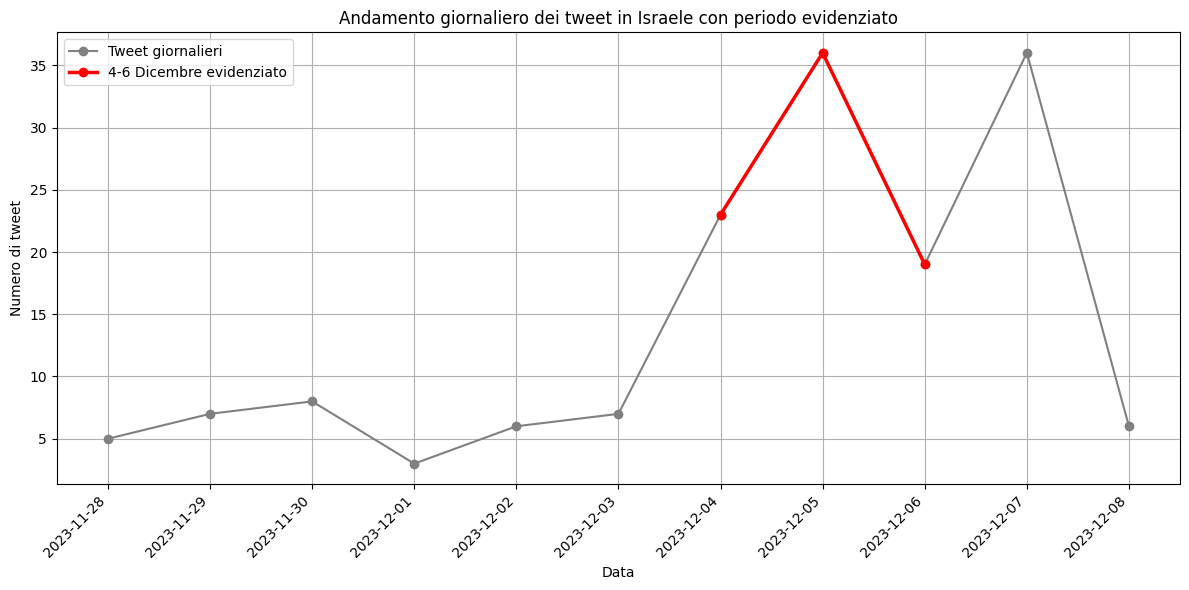

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Estrai solo la data (senza orario) e conta i tweet per giorno
filtered_israele['date_only'] = filtered_israele['parsed_date'].dt.date
tweet_counts = filtered_israele['date_only'].value_counts().sort_index()

# Date da evidenziare
highlight_start = pd.to_datetime("2023-12-04").date()
highlight_end = pd.to_datetime("2023-12-06").date()
highlighted_dates = [date for date in tweet_counts.index if highlight_start <= date <= highlight_end]
highlighted_counts = [tweet_counts[date] for date in highlighted_dates]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tweet_counts.index, tweet_counts.values, color='gray', marker='o', label='Tweet giornalieri')
ax.plot(highlighted_dates, highlighted_counts, color='red', marker='o', linewidth=2.5, label='4-6 Dicembre evidenziato')

# Gestione asse X con tick giornalieri
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xticks(tweet_counts.index)  # assicurati che tutte le date siano visualizzate
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Etichette
ax.set_title("Andamento giornaliero dei tweet in Israele con periodo evidenziato")
ax.set_xlabel("Data")
ax.set_ylabel("Numero di tweet")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()



In [5]:
from google.colab import files
uploaded = files.upload()

Saving dataset_unificato3.csv to dataset_unificato3.csv


In [6]:
import pandas as pd

russia = pd.read_csv("dataset_unificato3.csv")
russia.head()

Unnamed: 0               userid       username  \
0       58469           2845989686  AnguloInforma   
1       58470   842466588116819968   Resonanciaok   
2       58471            567289542  Saudi_Gazette   
3       58472  1499763123603050497   FuckPutinBot   
4       58473            629447345    Puc01829930   

                                            acctdesc  \
0  Somos la agencia de noticias 100% Duranguense🦂...   
1  📰Medio de comunicación que si dice la verdad d...   
2  Saudi Gazette is a leading English language da...   
3  I'm a bot. Every minute of every day, I tell P...   
4  A human being in love for Freedom, Justice, De...   

                        location  following  followers  totaltweets  \
0                Durango, México        789      12845       148224   
1                 Puebla, México        703       1057        26614   
2                   Saudi Arabia          2     467442       139394   
3                            NaN         14        287       438754   
4  worldwide, inside every heart         32         92        34615   

         usercreatedts              tweetid  ... original_tweet_userid  \
0  2014-10-08 03:54:45  1613324884926468099  ...                     0   
1  2017-03-16 20:04:21  1613324886130266112  ...                     0   
2  2012-04-30 13:01:28  1613324888646860801  ...                     0   
3  2022-03-04 15:06:25  1613324889917718534  ...                     0   
4  2012-07-07 16:15:02  1613324890786140160  ...                     0   

   original_tweet_username in_reply_to_status_id  in_reply_to_user_id  \
0                      NaN                     0                    0   
1                      NaN                     0                    0   
2                      NaN                     0                    0   
3                      NaN                     0                    0   
4                      NaN   1613221348624502784  1497792339997249536   

  in_reply_to_screen_name is_quote_status  quoted_status_id  \
0                     NaN           False                 0   
1                     NaN           False                 0   
2                     NaN           False                 0   
3                     NaN           False                 0   
4          cookmonika2022           False                 0   

   quoted_status_userid  quoted_status_username                 extractedts  
0                     0                     NaN  2023-01-12 14:42:24.748355  
1                     0                     NaN  2023-01-12 14:42:24.735655  
2                     0                     NaN  2023-01-12 09:26:50.260901  
3                     0                     NaN  2023-01-12 10:22:05.085586  
4                     0                     NaN  2023-01-12 10:22:05.072629  

[5 rows x 29 columns]

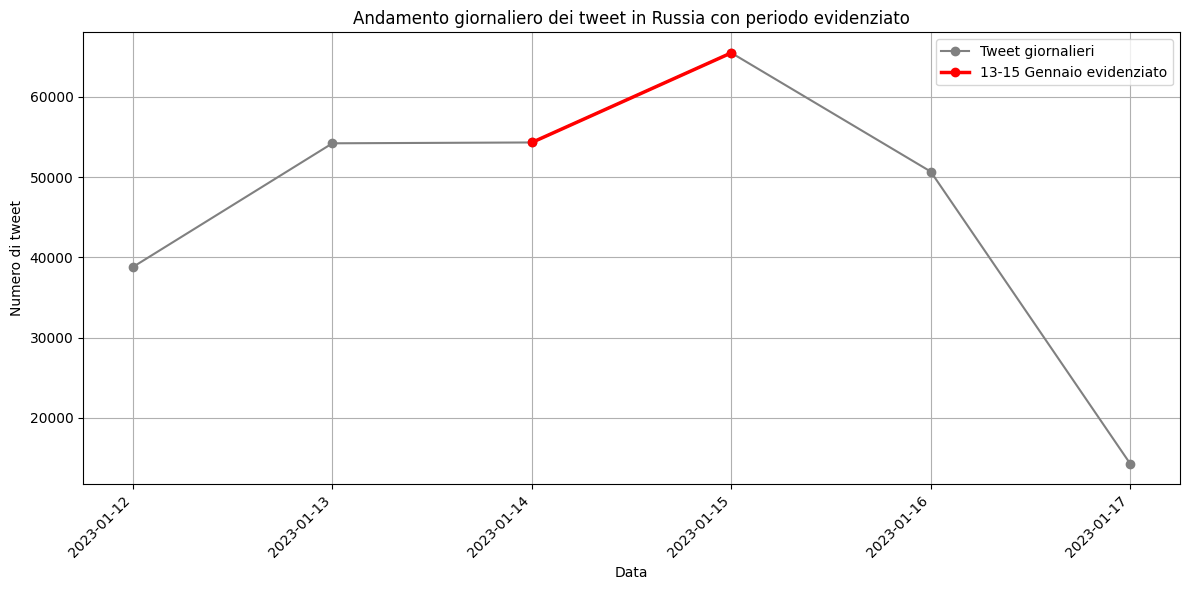

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# ✅ Conversione sicura a datetime
russia['extractedts'] = pd.to_datetime(russia['extractedts'], errors='coerce')

# Estrai solo la data (senza orario) e conta i tweet per giorno
russia['date_only'] = russia['extractedts'].dt.date
tweet_counts = russia['date_only'].value_counts().sort_index()

# Date da evidenziare
highlight_start = pd.to_datetime("2023-01-14").date()
highlight_end = pd.to_datetime("2023-01-15").date()
highlighted_dates = [date for date in tweet_counts.index if highlight_start <= date <= highlight_end]
highlighted_counts = [tweet_counts[date] for date in highlighted_dates]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(tweet_counts.index, tweet_counts.values, color='gray', marker='o', label='Tweet giornalieri')
ax.plot(highlighted_dates, highlighted_counts, color='red', marker='o', linewidth=2.5, label='13-15 Gennaio evidenziato')

# Gestione asse X con tick giornalieri
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_xticks(tweet_counts.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Etichette
ax.set_title("Andamento giornaliero dei tweet in Russia con periodo evidenziato")
ax.set_xlabel("Data")
ax.set_ylabel("Numero di tweet")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


INIZIO PRE PROCESSING PER EMBEDDING

In [7]:
russiaEn = russia[russia.language == 'en'].copy()
russiaEn[['language','text']]

language                                               text
2            en  #Russia’s Defense Ministry said its forces are...
4            en  @cookmonika2022 Ukraine January 11, 2023: Sole...
5            en  The war in #Ukraine certainly had a huge impac...
6            en  Brutal war: Elite Ukrainian forces ambush and ...
8            en  Elementally Evil Institutions: Wow, Get a Load...
...         ...                                                ...
277811       en  @JasminMuj OK, thanks.\n\nSo this refers prima...
277812       en  Russians Are Wearing Fake Ballistic Helmets In...
277813       en  #UkrainianArmy #UkraineRussianWar #UkraineWar ...
277816       en  #Russian troops find a large number of bombs, ...
277817       en  @realCEOofANTIFA @MarinereSteve LOL, exactly! ...

[119174 rows x 2 columns]

In [8]:
#Controlla quanti duplicati ci sono prima
n_duplicates1 = russiaEn.duplicated(subset="text").sum()
print(f"🔍 Trovati {n_duplicates1} duplicati nella colonna 'text'.")

# Rimuove i duplicati mantenendo solo la prima occorrenza
russiaEn = russiaEn.drop_duplicates(subset="text", keep="first").reset_index(drop=True)

print(f"✅ Dataset aggiornato. Nuove dimensioni: {russiaEn.shape}")

🔍 Trovati 2614 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (116560, 29)


In [9]:
!pip install clean-text
!pip install wordsegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=8ed5ef02a6dd40dd3ad281f2d37b892b57c3f7e975afc1d3ccd147082507683c
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 104.2 MB/s eta 0:00:00


In [10]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):
    text = tag[1:]  # Rimuove #

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in WHITELIST or text.lower() in ENGLISH_WORDS:
        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)

def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

russiaEn["text"].apply(segment_hashtag_text)
debug_hashtag_segmentation(russiaEn, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Output streaming troncato alle ultime 5000 righe.
    #Russian ➜ #russian

🔎 Tweet 296:
    #Kyiv ➜ #kyiv
    #Germany ➜ #germany
    #Ukraine ➜ #ukraine
    #usa ➜ #usa
    #Bachmut ➜ #bach mut

🔎 Tweet 297:
    #Montreal ➜ #montreal
    #climatechange ➜ #climate change
    #MontSaintAnne ➜ #mont saint anne
    #ski ➜ #ski
    #canada ➜ #canada

🔎 Tweet 298:
    #WarInUkraine ➜ #war in ukraine
    #Russia ➜ #russia
    #RussianPowerStruggle ➜ #russian power struggle
    #RussianWarCrimes ➜ #russian war crimes

🔎 Tweet 299:
    #Russia ➜ #russia
    #Ukraine ➜ #ukraine

🔎 Tweet 300:
    #Canada ➜ #canada
    #Germany ➜ #germany
    #Bakhmut ➜ #bakhmut
    #Kyiv ➜ #kyiv
    #Ukraine ➜ #ukraine

🔎 Tweet 301:
    #Alberta ➜ #alberta
    #Calgary ➜ #calgary
    #Canada ➜ #canada
    #AlbertaCanada ➜ #alberta canada

🔎 Tweet 302:
    #santos ➜ #santos
    #RESIGN ➜ #resign
    #constituents ➜ #constituents
    #politics ➜ #politics
    #USA ➜ #usa
    #UnitedStates ➜ #united states
    #Ame

In [11]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [12]:
# Segmenta gli hashtag nel testo
russiaEn["text"] = russiaEn["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
russiaEn["text"] = (
    russiaEn["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)


In [13]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

HARD_WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi", "binance", "idf", "hamas", "gaza", "jerusalem", "telaviv", "ramallah", "vs"
}

SOFT_WHITELIST = {
    "freepalestine", "standwithisrael", "prayforgaza", "fromtherivertothesea",
    "gazaunderattack", "savegaza", "zionistapartheid", "israelgenocide"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):

    text = tag[1:]  # Rimuove #

    # === Hard whitelist: mai segmentare ===
    if text.lower() in HARD_WHITELIST:
        return '#' + text.lower()

    # === Soft whitelist: segmenta se possibile ===
    if text.lower() in SOFT_WHITELIST:
        return '#' + ' '.join(segment(text.lower()))

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in HARD_WHITELIST or text.lower() in ENGLISH_WORDS:

        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in HARD_WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    if not isinstance(text, str):
        return ""  # oppure `return text` se preferisci lasciare inalterati i non-stringa
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)


def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

israele["text"] = israele["text"].fillna("").astype(str).apply(segment_hashtag_text)
debug_hashtag_segmentation(israele, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



🔎 Tweet 2:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles

🔎 Tweet 3:
    #veto ➜ #veto

🔎 Tweet 5:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza
    #idf ➜ #idf
    #hamas ➜ #hamas
    #hezbollah ➜ #hezbollah
    #west ➜ #west
    #jihad ➜ #jihad
    #iran ➜ #iran
    #palestine ➜ #palestine

🔎 Tweet 14:
    #hamas ➜ #hamas
    #palestine ➜ #palestine
    #palestine ➜ #palestine

🔎 Tweet 15:
    #israel ➜ #israel
    #israel ➜ #israel

🔎 Tweet 19:
    #hamas ➜ #hamas
    #israel ➜ #israel

🔎 Tweet 34:
    #free ➜ #free
    #israel ➜ #israel
    #war ➜ #war

🔎 Tweet 35:
    #gaza ➜ #gaza
    #huj ➜ #huj

🔎 Tweet 39:
    #hamas ➜ #hamas
    #arras ➜ #arras

🔎 Tweet 40:
    #ryan ➜ #ryan
    #num ➜ #num

🔎 Tweet 45:
    #gaza ➜ #gaza

🔎 Tweet 46:
    #icy ➜ #icy

🔎 Tweet 47:
    #hamas ➜ #hamas
    #israel ➜ #israel
    #gaza ➜ #gaza

🔎 Tweet 49:
    #gaza ➜ #gaza

🔎 Tweet 55:
    #e ➜ #e
    #asian ➜ #asian
    #smack ➜ #smack
    #isles ➜ #isles


In [14]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [15]:
# Segmenta gli hashtag nel testo
israele["text"] = israele["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
israele["text"] = (
    israele["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)

In [16]:
israele[['parsed_date', 'text']]


parsed_date                                               text
0     2023-11-22 21:47:00  a statement from psychoanalytic activists the ...
1     2023-11-22 15:27:00                          bak bak bak bak doyamadnz
2     2023-10-07 07:15:00  check out 35 + different erik karlsson cards l...
3     2023-11-23 11:12:00  il sen passe des trucs pendant quon vous orien...
4     2023-11-22 21:45:00  aw okay well thats cool im sure pal will appre...
...                   ...                                                ...
15493 2023-12-13 00:46:00                 the hamas terrorists are pure evil
15494 2023-12-12 03:20:00  ingiliz cocuklardan filistine destek mesajlar ...
15495 2023-12-13 00:47:00  has hamas leadership stated it would abide by ...
15496 2023-12-13 01:41:00  israels un representative erdan holds up hamas...
15497 2023-12-12 15:32:00  israil hamas vurmaya devam ettigini soyledi as...

[15498 rows x 2 columns]

In [17]:
russiaEn [['extractedts', 'text']]

extractedts  \
0       2023-01-12 09:26:50.260901   
1       2023-01-12 10:22:05.072629   
2       2023-01-12 04:11:22.932750   
3       2023-01-12 06:56:32.898331   
4       2023-01-12 02:36:21.896187   
...                            ...   
116555  2023-01-17 02:12:12.529531   
116556  2023-01-17 02:16:43.813788   
116557  2023-01-17 02:12:12.514570   
116558  2023-01-17 02:01:42.492345   
116559  2023-01-17 02:12:12.492254   

                                                     text  
0       russias defense ministry said its forces are t...  
1       ukraine january 11 2023 soledar is only a defe...  
2       the war in ukraine certainly had a huge impact...  
3       brutal war elite ukrainian forces ambush and d...  
4       elementally evil institutions wow get a load o...  
...                                                   ...  
116555  ok thanks so this refers primarily to serbia a...  
116556  russians are wearing fake ballistic helmets in...  
116557  ukrainian army ukraine russian war ukraine war...  
116558  russian troops find a large number of bombs mi...  
116559  lol exactly the budapest memorandum came first...  

[116560 rows x 2 columns]

embedding

In [18]:
import pandas as pd
import numpy as np
import torch
from sentence_transformers import SentenceTransformer

# === 0. Verifica GPU ===
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"📦 Esecuzione su: {device.upper()}")

# === 1. Aggiungi colonna 'origine'
israele["origine"] = "Israele"
russiaEn["origine"] = "Russia"

# === 2. Unione dei dataset
unione = pd.concat([israele, russiaEn], ignore_index=True)

# === 3. Estrai testi
text_column = "text"
texts = unione[text_column].astype(str).tolist()

# === 4. Carica modello SentenceTransformer
model = SentenceTransformer("sentence-transformers/all-mpnet-base-v2", device=device)

# === 5. Calcola gli embedding
embeddings = model.encode(
    texts,
    batch_size=32,
    show_progress_bar=True,
    device=device
)

# === 6. Costruisci DataFrame degli embedding
emb_df = pd.DataFrame(embeddings, columns=[f"emb_{i}" for i in range(embeddings.shape[1])])

# === 7. Unisci embeddings al DataFrame principale
unione = pd.concat([unione.reset_index(drop=True), emb_df], axis=1)

# === 8. Salva tutto
unione.to_csv("dataset_con_embedding.csv", index=False)
np.save("embedding_unificati.npy", embeddings)

print("✅ Embedding calcolati con all-mpnet-base-v2 e salvati con colonna 'origine'!")





📦 Esecuzione su: CUDA


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4127 [00:00<?, ?it/s]

✅ Embedding calcolati con all-mpnet-base-v2 e salvati con colonna 'origine'!


INIZIAMO PROCESSO PER CLUSTERIZZARE
UTILIZZAREMO PCA PER RIDURRE LA DIMENSIONALITA' E K-MEANS SUGLI EMBEDDING


In [19]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import umap.umap_ as umap

# === Carica dataset e embedding
df = pd.read_csv("dataset_con_embedding.csv")
embeddings = np.load("embedding_unificati.npy")


<ipython-input-19-3463169859>:10: DtypeWarning: Columns (1,3,6,10,11,12,16,18,20,21,22,24,30,31,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_con_embedding.csv")


In [ ]:
# === Riduzione dimensionale
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


capiamo in questo modo il numero di cluster

📌 Numero ottimale di cluster (Elbow): 5


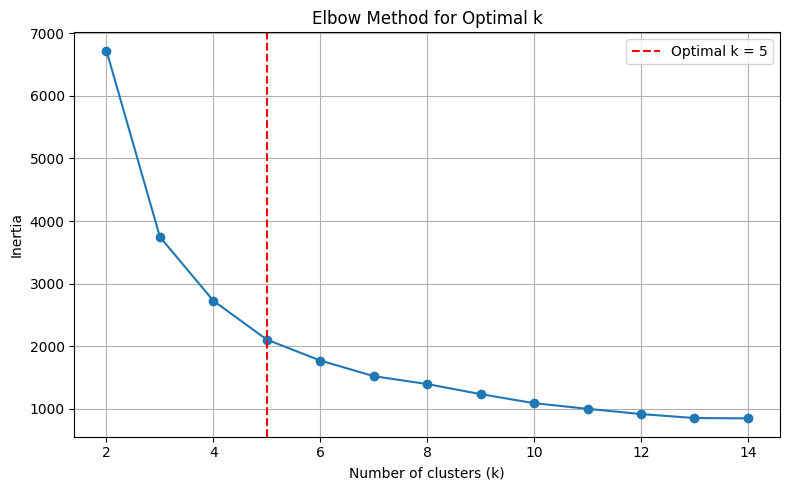

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Calcola l'inerzia per un range di k
inertias = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(reduced_embeddings)  # usa gli embedding già ridotti con PCA
    inertias.append(kmeans.inertia_)

# Trova il punto di gomito (elbow)
knee = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"📌 Numero ottimale di cluster (Elbow): {optimal_k}")

# Grafico
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_embeddings)
df["cluster"] = cluster_labels


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


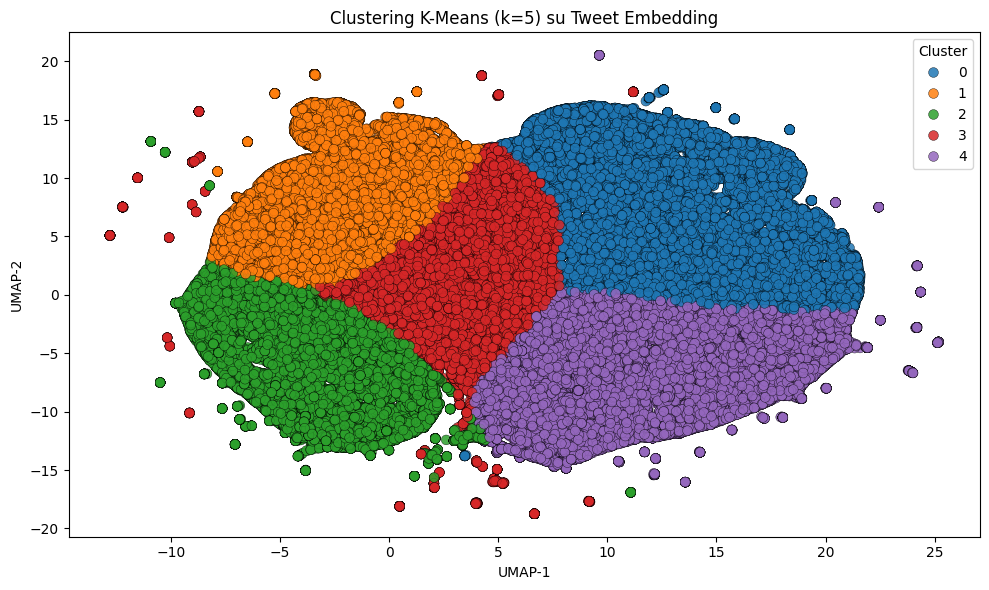

In [ ]:
umap_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean").fit_transform(reduced_embeddings)
df["UMAP-1"] = umap_2d[:, 0]
df["UMAP-2"] = umap_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="UMAP-1", y="UMAP-2",
    hue="cluster", palette="tab10", s=50,
    edgecolor="black", linewidth=0.3, alpha=0.85
)
plt.title(f"Clustering K-Means (k={optimal_k}) su Tweet Embedding")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


silhoutte score e calcolo delle etichette con tf-idf su dataset unito

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_embeddings, cluster_labels)
print(f"✅ Silhouette Score: {score:.3f}")


✅ Silhouette Score: 0.436


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_terms_per_cluster(df, n_terms=6):
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    summaries = {}
    for cluster_id in sorted(df["cluster"].unique()):
        texts = df[df["cluster"] == cluster_id]["text"].dropna().astype(str)
        if texts.empty:
            summaries[cluster_id] = ["(nessun testo valido)"]
            continue
        tfidf_matrix = vectorizer.fit_transform(texts)
        mean_tfidf = tfidf_matrix.mean(axis=0).A1
        terms = vectorizer.get_feature_names_out()
        top_indices = mean_tfidf.argsort()[::-1][:n_terms]
        summaries[cluster_id] = [terms[i] for i in top_indices]
    return summaries

labels = get_top_terms_per_cluster(df)
for cid, words in labels.items():
    print(f"🧠 Cluster {cid}: {', '.join(words)}")




🧠 Cluster 0: ukraine, war, russia, russian, germany, ukrainian
🧠 Cluster 1: miss, universe, canada, universe2022, ukraine, germany
🧠 Cluster 2: irgc, hamas, terrorists, israel, iran, terrorist
🧠 Cluster 3: ukraine, russia, war, people, russian, putin
🧠 Cluster 4: russia, ukraine, state, war, terrorist, russian


CLUSTER SEPARATO PER LE DUE GUERRE

In [20]:
import pandas as pd
import numpy as np

# === Carica dataset e embeddings ===
#df = pd.read_csv("dataset_con_embedding.csv")
#embeddings = np.load("embedding_unificati.npy")

# === Suddividi per origine ===
df_russia = df[df["origine"] == "Russia"].copy()
df_israele = df[df["origine"] == "Israele"].copy()
emb_russia = embeddings[df_russia.index]
emb_israele = embeddings[df_israele.index]




In [21]:
from sklearn.decomposition import PCA

# === Filtra embeddings per Russia e Israele
russia_mask = df["origine"] == "Russia"
russia_embeddings = embeddings[russia_mask.values]

israele_mask = df["origine"] == "Israele"
israele_embeddings = embeddings[israele_mask.values]

# === Riduzione PCA a 2D
pca_russia = PCA(n_components=2)
russia_reduced = pca_russia.fit_transform(russia_embeddings)

pca_israele = PCA(n_components=2)
israele_reduced = pca_israele.fit_transform(israele_embeddings)



📌 Russia: numero ottimale di cluster (Elbow) = 5


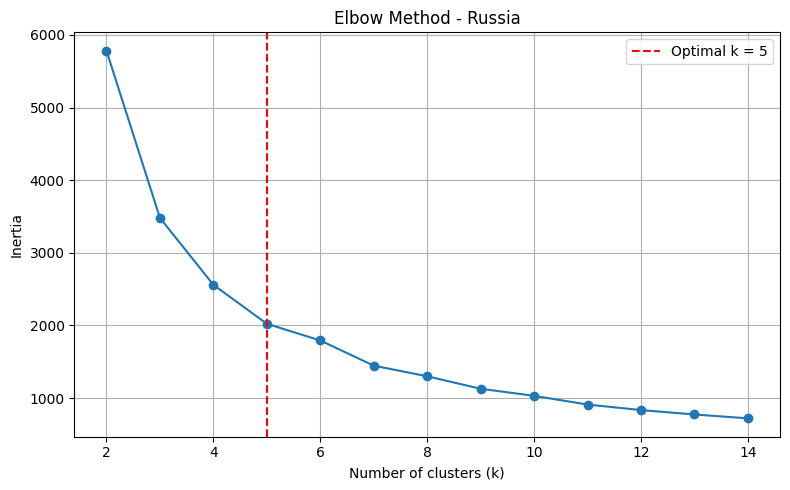

📌 Israele: numero ottimale di cluster (Elbow) = 6


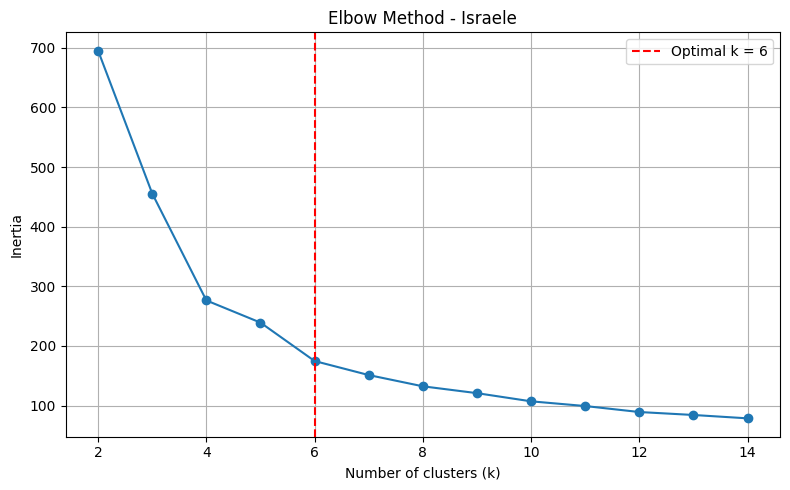

In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

def plot_elbow(reduced_data, nome):
    inertias = []
    k_range = range(2, 15)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(reduced_data)
        inertias.append(kmeans.inertia_)

    # Trova punto di gomito
    knee = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
    optimal_k = knee.knee
    print(f"📌 {nome}: numero ottimale di cluster (Elbow) = {optimal_k}")

    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(k_range, inertias, marker='o')
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title(f"Elbow Method - {nome}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === Esegui separatamente per Russia e Israele
plot_elbow(russia_reduced, "Russia")
plot_elbow(israele_reduced, "Israele")


In [22]:
from sklearn.cluster import KMeans

# Clustering per Russia
optimal_k_russia = 5  # o il valore trovato con l'elbow method
kmeans_russia = KMeans(n_clusters=optimal_k_russia, random_state=42)
russia_clusters = kmeans_russia.fit_predict(russia_reduced)
df.loc[df["origine"] == "Russia", "cluster"] = russia_clusters

# Clustering per Israele
optimal_k_israele = 6  # o il valore trovato con l'elbow method
kmeans_israele = KMeans(n_clusters=optimal_k_israele, random_state=42)
israele_clusters = kmeans_israele.fit_predict(israele_reduced)
df.loc[df["origine"] == "Israele", "cluster"] = israele_clusters

# Assicurati che il tipo della colonna cluster sia intero
df["cluster"] = df["cluster"].astype(int)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-64-282386284>:16: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-64-282386284>:16: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


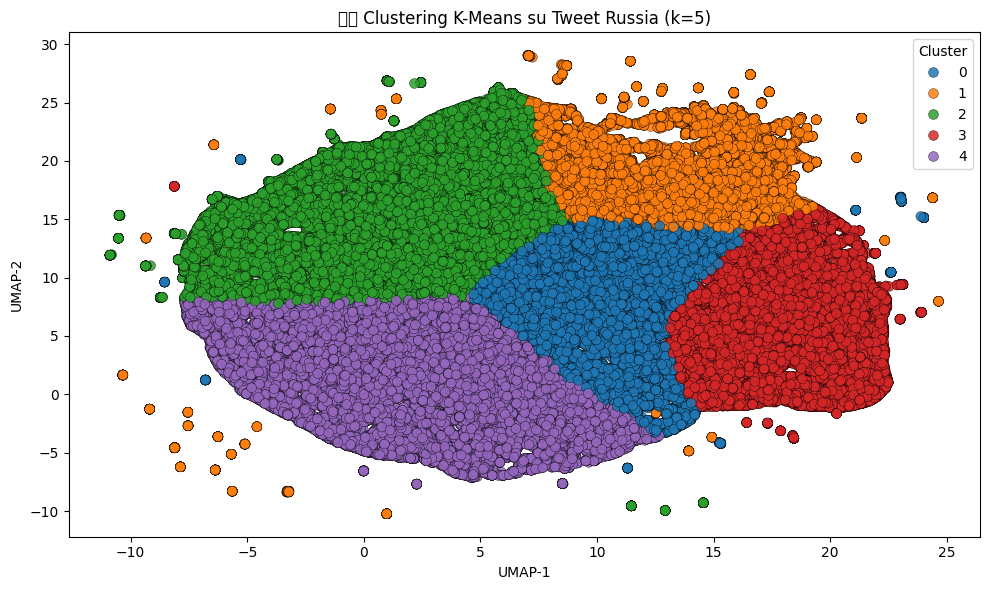

In [ ]:
# UMAP per Russia
umap_russia = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean").fit_transform(russia_reduced)
df.loc[df["origine"] == "Russia", "UMAP-1"] = umap_russia[:, 0]
df.loc[df["origine"] == "Russia", "UMAP-2"] = umap_russia[:, 1]

# Plot Russia
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df["origine"] == "Russia"],
    x="UMAP-1", y="UMAP-2",
    hue="cluster", palette="tab10", s=50,
    edgecolor="black", linewidth=0.3, alpha=0.85
)
plt.title(f"🇷🇺 Clustering K-Means su Tweet Russia (k={optimal_k_russia})")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-63-189560088>:16: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-63-189560088>:16: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


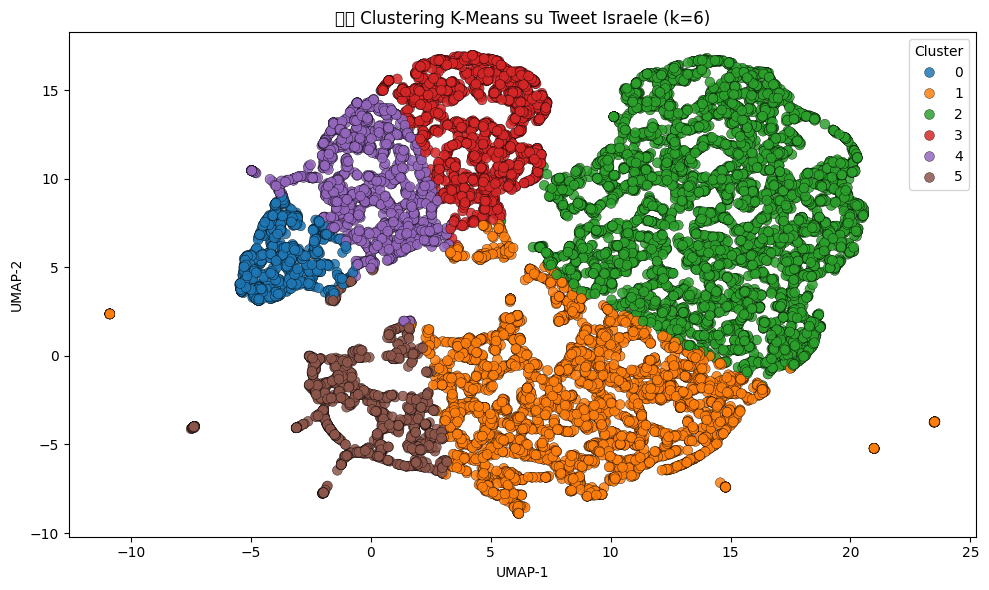

In [ ]:
# UMAP per Israele
umap_israele = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean").fit_transform(israele_reduced)
df.loc[df["origine"] == "Israele", "UMAP-1"] = umap_israele[:, 0]
df.loc[df["origine"] == "Israele", "UMAP-2"] = umap_israele[:, 1]

# Plot Israele
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df[df["origine"] == "Israele"],
    x="UMAP-1", y="UMAP-2",
    hue="cluster", palette="tab10", s=50,
    edgecolor="black", linewidth=0.3, alpha=0.85
)
plt.title(f"🇮🇱 Clustering K-Means su Tweet Israele (k={optimal_k_israele})")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score_russia = silhouette_score(russia_reduced, russia_clusters)
print(f"Silhouette Score (Russia): {score_russia:.3f}")


Silhouette Score (Russia): 0.417


In [ ]:
score_israele = silhouette_score(israele_reduced, israele_clusters)
print(f"Silhouette Score (Israele): {score_israele:.3f}")


Silhouette Score (Israele): 0.448


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_terms_per_cluster(df, n_terms=6):
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    summaries = {}
    for cluster_id in sorted(df["cluster"].unique()):
        texts = df[df["cluster"] == cluster_id]["text"].dropna().astype(str)
        if texts.empty:
            summaries[cluster_id] = ["(nessun testo valido)"]
            continue
        tfidf_matrix = vectorizer.fit_transform(texts)
        mean_tfidf = tfidf_matrix.mean(axis=0).A1
        terms = vectorizer.get_feature_names_out()
        top_indices = mean_tfidf.argsort()[::-1][:n_terms]
        summaries[cluster_id] = [terms[i] for i in top_indices]
    return summaries


In [ ]:
labels_russia = get_top_terms_per_cluster(df[df["origine"] == "Russia"])
print("🇷🇺 Etichette Russia:")
for cid, words in labels_russia.items():
    print(f"🧠 Cluster {cid}: {', '.join(words)}")


🇷🇺 Etichette Russia:
🧠 Cluster 0: ukraine, russia, war, russian, slava, nato
🧠 Cluster 1: irgc, terrorists, iran, russia, people, terrorist
🧠 Cluster 2: russia, ukraine, war, state, terrorist, russian
🧠 Cluster 3: miss, universe, canada, universe2022, germany, ukraine
🧠 Cluster 4: ukraine, war, russia, russian, germany, bakhmut


In [ ]:
labels_israele = get_top_terms_per_cluster(df[df["origine"] == "Israele"])
print("\n🇮🇱 Etichette Israele:")
for cid, words in labels_israele.items():
    print(f"🧠 Cluster {cid}: {', '.join(words)}")



🇮🇱 Etichette Israele:
🧠 Cluster 0: netanyahou, le, la, et, les, que
🧠 Cluster 1: israel, hamas, gaza, palestine, war, hou
🧠 Cluster 2: hamas, israel, gaza, war, hostages, ceasefire
🧠 Cluster 3: hamas, que, la, en, israel, el
🧠 Cluster 4: le, la, les, hamas, et, israel
🧠 Cluster 5: war, hou, netanya, biden, terrorists, criminals


sentiment analysis sui cluster

LABEL_0 → Negative

LABEL_1 → Neutral

LABEL_2 → Positive

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cuda:0


📊 Analisi sentiment per: Russia


Sentiment Russia: 100%|█████████████████████████████████████| 116560/116560 [20:11<00:00, 96.21it/s]


📊 Analisi sentiment per: Israele


Sentiment Israele: 100%|██████████████████████████████████████| 15498/15498 [02:41<00:00, 95.80it/s]
<ipython-input-23-1824954239>:71: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-1824954239>:71: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


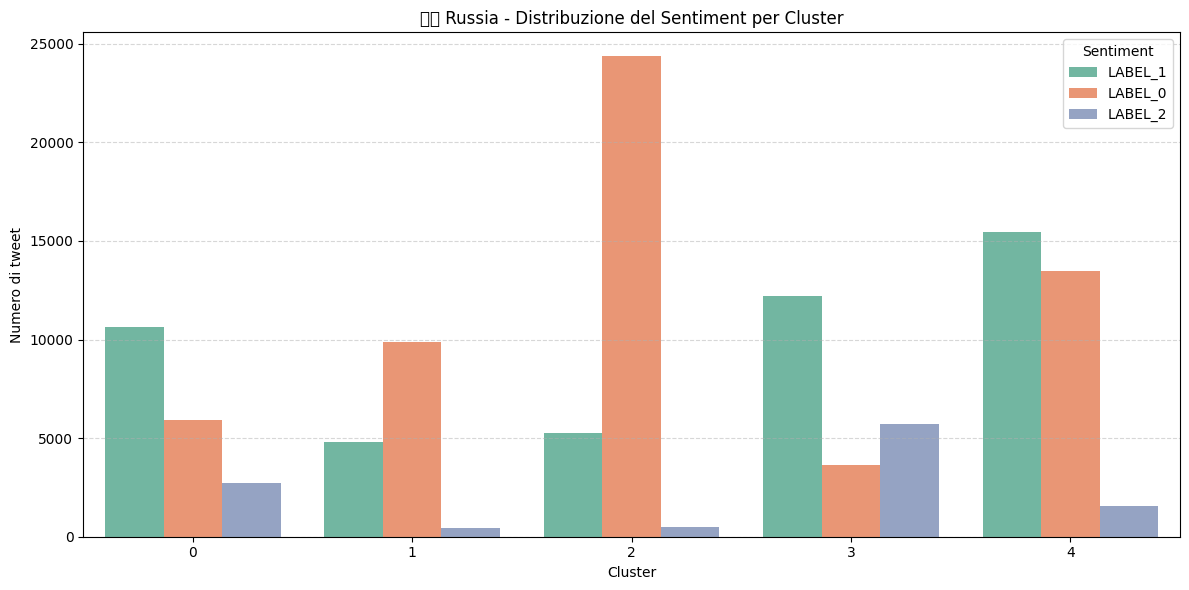

<ipython-input-23-1824954239>:71: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-1824954239>:71: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127473 (\N{REGIONAL INDICATOR SYMBOL LETTER L}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


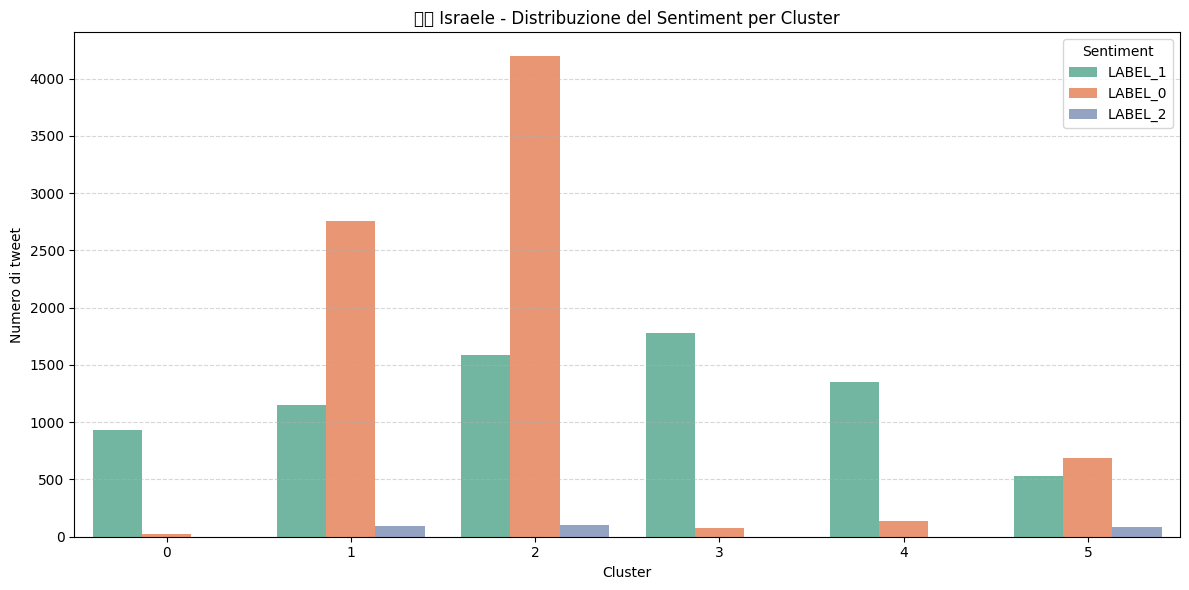

In [23]:
import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
from transformers import pipeline
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Setup dispositivo e pipeline di sentiment analysis
device = 0 if torch.cuda.is_available() else -1
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", device=device)

# === 2. Funzione robusta per il sentiment
def get_sentiment(text):
    try:
        result = sentiment_pipeline(text[:512])[0]
        return result["label"]
    except Exception:
        return "ERROR"

# === 3. Funzione applicata con tqdm (senza flood in console)
def apply_sentiment(df, label):
    print(f"📊 Analisi sentiment per: {label}")
    sentiments = []
    for text in tqdm(df["text"].astype(str), desc=f"Sentiment {label}", ncols=100):
        sentiments.append(get_sentiment(text))
    df["sentiment"] = sentiments
    return df

# === 4. Funzione per contare sentiment per cluster
def sentiment_counts(df, origine):
    cluster_sentiment = []
    for cluster_id in sorted(df["cluster"].unique()):
        sub = df[df["cluster"] == cluster_id]
        counts = dict(Counter(sub["sentiment"].dropna()))
        for label, count in counts.items():
            cluster_sentiment.append({
                "origine": origine,
                "cluster": cluster_id,
                "sentiment": label,
                "count": count
            })
    return pd.DataFrame(cluster_sentiment)

# === 5. Applica tutto
df_russia = df[df["origine"] == "Russia"].copy()
df_israele = df[df["origine"] == "Israele"].copy()

df_russia = apply_sentiment(df_russia, "Russia")
df_israele = apply_sentiment(df_israele, "Israele")

df_sentiment_russia = sentiment_counts(df_russia, "Russia")
df_sentiment_israele = sentiment_counts(df_israele, "Israele")

# === 6. Funzione di visualizzazione
def plot_sentiment(df_sentiment, origine_flag, titolo):
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_sentiment,
        x="cluster",
        y="count",
        hue="sentiment",
        palette="Set2"
    )
    plt.title(f"{origine_flag} {titolo}")
    plt.xlabel("Cluster")
    plt.ylabel("Numero di tweet")
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.legend(title="Sentiment")
    plt.tight_layout()
    plt.show()

# === 7. Visualizza
plot_sentiment(df_sentiment_russia, "🇷🇺", "Russia - Distribuzione del Sentiment per Cluster")
plot_sentiment(df_sentiment_israele, "🇮🇱", "Israele - Distribuzione del Sentiment per Cluster")



In [24]:
import numpy as np
from sklearn.cluster import KMeans

def cluster_cohesion(reduced_data, k):
    # Fitta KMeans con k cluster
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(reduced_data)
    centroids = kmeans.cluster_centers_

    # Calcola distanze euclidee: ogni punto al proprio centroide
    distances = np.linalg.norm(reduced_data - centroids[labels], axis=1)

    # Calcola media e deviazione standard per cluster
    cohesion = {}
    for cluster in range(k):
        mask = (labels == cluster)
        d = distances[mask]
        cohesion[cluster] = {
            'mean_distance': np.mean(d),
            'std_distance': np.std(d),
            'size': d.size
        }

    return cohesion, kmeans

# Esempio d’uso:
cohesion_rus, kmeans_rus = cluster_cohesion(russia_reduced, optimal_k_russia)
cohesion_isr, kmeans_isr = cluster_cohesion(israele_reduced, optimal_k_israele)

# Visualizzazione dei risultati
import pandas as pd
print("🔹 Russia cluster cohesion:")
print(pd.DataFrame(cohesion_rus).T)

print("\n🔹 Israele cluster cohesion:")
print(pd.DataFrame(cohesion_isr).T)


🔹 Russia cluster cohesion:
   mean_distance  std_distance     size
0       0.123022      0.047474  19292.0
1       0.151634      0.062137  15074.0
2       0.123687      0.055084  30141.0
3       0.112031      0.056082  21579.0
4       0.103622      0.045840  30474.0

🔹 Israele cluster cohesion:
   mean_distance  std_distance    size
0       0.114408      0.056041   963.0
1       0.086950      0.042895  4002.0
2       0.072741      0.036410  5888.0
3       0.117433      0.048711  1852.0
4       0.131334      0.052711  1492.0
5       0.119781      0.056032  1301.0


In [25]:
import pandas as pd
from scipy.stats import spearmanr

# Russia
df_rus = pd.DataFrame(cohesion_rus).T
corr_rus, pval_rus = spearmanr(df_rus['size'], df_rus['mean_distance'])
print("🇷🇺 Russia:")
print(f"  ➤ Spearman correlazione (size vs mean_distance): {corr_rus:.3f}, p‑value = {pval_rus:.3f}")

# Israele
df_isr = pd.DataFrame(cohesion_isr).T
corr_isr, pval_isr = spearmanr(df_isr['size'], df_isr['mean_distance'])
print("🇮🇱 Israele:")
print(f"  ➤ Spearman correlazione (size vs mean_distance): {corr_isr:.3f}, p‑value = {pval_isr:.3f}")


🇷🇺 Russia:
  ➤ Spearman correlazione (size vs mean_distance): -0.700, p‑value = 0.188
🇮🇱 Israele:
  ➤ Spearman correlazione (size vs mean_distance): -0.600, p‑value = 0.208


Russia
Correlazione (ρ): +0.429 → c'è una tendenza moderata: cluster più grandi tendono ad avere una maggiore dispersione semantica.

p-value: 0.337 → non statisticamente significativa (di solito servirebbe p < 0.05).

Interpretazione:\
Nonostante la correlazione moderata, non puoi concludere con certezza che questa relazione esista nei tuoi dati — potrebbe essere casuale.

Potrebbe esserci un pattern reale, ma servirebbero più cluster (o più dati) per confermarlo.

 Israele
Correlazione (ρ): +0.286 → leggera tendenza nella stessa direzione (più grande → più disperso).

p-value: 0.493 → ancor meno significativa.

 Interpretazione:
Anche qui, la relazione è debole e non significativa.

I cluster israeliani non mostrano una chiara tendenza tra dimensione e coerenza interna.

Cosa possiamo concludere?\
Entrambi i casi mostrano una leggera tendenza coerente, ma nessuna evidenza forte a sostegno.

Questo rafforza l’idea che i tuoi tweet, trattando un evento comune, siano semanticamente concentrati, e che la dispersione non sia strettamente legata al numero di tweet in un cluster.

prova per vedere se due eventi diversi riesci a clusterizzarli per bene
è stato preso il 15 novembre 2022, gioro in cui trump si presenta come nuovo candidato come presidente usa

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 0710_UkraineCombinedTweetsDeduped.csv to 0710_UkraineCombinedTweetsDeduped.csv


In [ ]:
import pandas as pd

cluster = pd.read_csv("0710_UkraineCombinedTweetsDeduped.csv")
cluster.head()

Unnamed: 0               userid         username  \
0           0  1475409280643649537        SK_Anime_   
1           1            348479470        kiko_masa   
2           2  1322860723844734976  AwarenessChang1   
3           3  1219957063729573888        061626USA   
4           4           2354748390       PiotrBILOS   

                                            acctdesc       location  \
0  Sportskeeda - For the hardcore Anime fan!\nSin...  United States   
1  FROM YOUTH TO THE FUTURE\nフォローお願いします😃\nLINE公式ア...            NaN   
2          Buddhist、 Taiwan First、台美日越同盟、百越泛太平洋文明圈復興            NaN   
3  スーパーUSA松任店Twitterです！よろしくお願いします！\n #USA #パチンコ #...            NaN   
4  Prof. des Universités, Inalco, Paris, please d...            NaN   

   following  followers  totaltweets               usercreatedts  \
0          6        342         2286  2021-12-27 10:13:07.000000   
1        123        128         5943  2011-08-04 14:10:38.000000   
2       1043        216        47044  2020-11-01 11:19:19.000000   
3        535       1243         1901  2020-01-22 12:17:13.000000   
4       2100       1040        12032  2014-02-21 12:51:02.000000   

               tweetid  ... original_tweet_userid  original_tweet_username  \
0  1545920737034137600  ...                     0                      NaN   
1  1545920737185128448  ...                     0                      NaN   
2  1545920738410262528  ...   1356158825825525760          bayraktar_1love   
3  1545920739030708224  ...                     0                      NaN   
4  1545920740108783616  ...   1458768571631296512            SenderGliwice   

  in_reply_to_status_id in_reply_to_user_id in_reply_to_screen_name  \
0                     0                   0                     NaN   
1                     0                   0                     NaN   
2                     0                   0                     NaN   
3                     0                   0                     NaN   
4                     0                   0                     NaN   

  is_quote_status     quoted_status_id  quoted_status_userid  \
0           False                    0                     0   
1           False                    0                     0   
2           False                    0                     0   
3           False                    0                     0   
4            True  1545792628045791232                     0   

   quoted_status_username                 extractedts  
0                     NaN  2022-07-10 02:11:42.517278  
1                     NaN  2022-07-10 02:11:42.505324  
2                     NaN  2022-07-10 00:49:27.548862  
3                     NaN  2022-07-10 02:11:42.493403  
4                     NaN  2022-07-10 00:49:27.521016  

[5 rows x 29 columns]

In [ ]:
en_dataCluster = cluster[cluster.language == 'en'].copy()
en_dataCluster[['language','text']]

language                                               text
0            en  Mob Psycho 100 Season 3 confirmed to debut at ...
2            en  Pleasant crackling of Russian ammunition can b...
6            en  The Joker #15 Review #gotham #batman #redhood ...
7            en  "I fully support efforts by the @StateDept to ...
8            en  Once a liar, always a liar. \n\nEnd of quote. ...
...         ...                                                ...
178928       en  #Ukraine The world must do more to stop this a...
178930       en  As the world focuses on #Ukraine we urge the @...
178932       en  this. #biden #HunterBiden #4chan https://t.co/...
178933       en  The #Canadian government has decided to sidest...
178934       en  I have a stigma about being serious so all my ...

[121766 rows x 2 columns]

In [ ]:
#Controlla quanti duplicati ci sono prima
n_duplicates1 = en_dataCluster.duplicated(subset="text").sum()
print(f"🔍 Trovati {n_duplicates1} duplicati nella colonna 'text'.")

# Rimuove i duplicati mantenendo solo la prima occorrenza
en_dataCluster = en_dataCluster.drop_duplicates(subset="text", keep="first").reset_index(drop=True)

print(f"✅ Dataset aggiornato. Nuove dimensioni: {en_dataCluster.shape}")

🔍 Trovati 85656 duplicati nella colonna 'text'.
✅ Dataset aggiornato. Nuove dimensioni: (36110, 29)


In [ ]:
!pip install clean-text
!pip install wordsegment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.5 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=e7966478b911a45c83ce86a9b28183ac09a5393d04d218af8f47a0fa44dfb334
  Stored in directory: /root/.cache/pip/wheels/bd/22/e5/b69726d5e1a19795ecd3b3e7464b16c0f1d019aa94ff1c8578
Successfully built emoji
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.5 MB/s eta 0:00:00


In [ ]:
import re
from wordsegment import load, segment
import nltk
from nltk.corpus import words

# =======================
# 🔧 Setup iniziale
# =======================

load()
nltk.download('words')

ENGLISH_WORDS = set(w.lower() for w in words.words())

WHITELIST = {
    "putin", "bakhmut", "zelensky", "kyiv", "prigozhin", "avdiivka", "kherson",
    "donetsk", "belgorod", "luhansk", "mariupol", "dnipro", "odessa", "severodonetsk",
    "kramatorsk", "sloviansk", "ukraine", "russia", "kremlin", "moscow", "wagner",
    "girkin", "lukashenko", "zelenskys", "kiev", "kharkiv", "svpol", "föpol", "swe",
    "nato", "nafo", "ucraina", "ukraini", "dpsu", "vodyane", "karlivka", "avdeevka", "pervomaisky", "artyomovsk", "wef",
    "cherevatyi"
}

# =======================
# 🔍 Funzioni di supporto
# =======================

def is_camel_case(s):
    return s != s.lower() and s != s.upper() and any(c.isupper() for c in s[1:])

def split_camel_case(s):
    return re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)

def segment_hashtag_strict(tag):
    text = tag[1:]  # Rimuove #

    # Check se tutto il tag è nella whitelist o nel dizionario
    if text.lower() in WHITELIST or text.lower() in ENGLISH_WORDS:
        return '#' + text.lower()

    # Altrimenti procedi con segmentazione
    if is_camel_case(text):
        words = split_camel_case(text).split()
    else:
        words = segment(text)

    refined_words = []
    for word in words:
        w_lower = word.lower()
        if (
            w_lower in WHITELIST or
            w_lower in ENGLISH_WORDS or
            len(w_lower) <= 6 or
            not w_lower.isalpha()
        ):
            refined_words.append(w_lower)
        else:
            refined_words.extend(segment(w_lower))

    return '#' + ' '.join(refined_words)

def segment_hashtag_text(text):
    return re.sub(r'#\w+', lambda m: segment_hashtag_strict(m.group()), text)

def debug_hashtag_segmentation(df, column_name="text", max_rows=5):
    for idx, row in df.head(max_rows).iterrows():
        original = row[column_name]
        hashtags = re.findall(r'#\w+', original)
        if not hashtags:
            continue
        print(f"\n🔎 Tweet {idx}:")
        for tag in hashtags:
            print(f"    {tag} ➜ {segment_hashtag_strict(tag)}")

# =============================
# ✅ Applicazione al dataset
# =============================

en_dataCluster["text"].apply(segment_hashtag_text)
debug_hashtag_segmentation(en_dataCluster, column_name="text", max_rows=1000)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Output streaming troncato alle ultime 5000 righe.
🔎 Tweet 171:
    #Ukraine ➜ #ukraine

🔎 Tweet 172:
    #RussiaUkraineWar ➜ #russia ukraine war

🔎 Tweet 173:
    #Tigray ➜ #tigray
    #TigrayCantWait ➜ #tigray cant wait

🔎 Tweet 174:
    #Putin ➜ #putin
    #Ukrainian ➜ #ukrainian
    #Russia ➜ #russia
    #Ukraine ➜ #ukraine
    #StopPutinNOW ➜ #stop putin now
    #RussiaKills ➜ #russia kills

🔎 Tweet 175:
    #war ➜ #war
    #pestilence ➜ #pestilence
    #famine ➜ #famine
    #apostles ➜ #apostles
    #build ➜ #build
    #LIKE ➜ #like
    #SHARE ➜ #share
    #SUB ➜ #sub
    #IUIC ➜ #i uic
    #Bible ➜ #bible
    #truth ➜ #truth

🔎 Tweet 176:
    #RussiaTerroristState ➜ #russia terrorist state
    #Kharkiv ➜ #kharkiv
    #RussianArmy ➜ #russian army
    #putin ➜ #putin
    #PutinWarCrimes ➜ #putin war crimes
    #PutinHitler ➜ #putin hitler
    #PutinIsaWarCriminal ➜ #putin isa war criminal

🔎 Tweet 177:
    #Russia ➜ #russia
    #Putin ➜ #putin
    #Ukraine ➜ #ukraine
    #Europe ➜ 

In [ ]:
import re
from cleantext import clean
import emoji

def remove_mentions(text):
    return re.sub(r'@\w+', '', text).strip()

def remove_http(text):
    return re.sub(r"http\S+", "", text).strip()

def remove_hashtags(text):
    return re.sub(r'#', '', text)

def remove_emojis(text):
    return emoji.replace_emoji(text, replace="")

def clean_text(text):
    cleaned_text = clean(text, fix_unicode=True,
                               to_ascii=True,
                               lower=True,
                               no_line_breaks=True,
                               no_urls=False,
                               no_emails=True,
                               no_phone_numbers=True,
                               no_numbers=False,
                               no_digits=False,
                               no_currency_symbols=True,
                               no_punct=True)
    return cleaned_text

In [ ]:
# Segmenta gli hashtag nel testo
en_dataCluster["text"] = en_dataCluster["text"].apply(segment_hashtag_text)

# Applica pulizia in ordine logico
en_dataCluster["text"] = (
    en_dataCluster["text"]
    .apply(remove_hashtags)
    .apply(remove_http)
    .apply(remove_mentions)    # ← usa questa!
    .apply(remove_emojis)
    .apply(clean_text)
)

In [ ]:
en_dataCluster [['text']]

text
0      mob psycho 100 season 3 confirmed to debut at ...
1      pleasant crackling of russian ammunition can b...
2      the joker 15 review gotham batman red hood gri...
3      i fully support efforts by the to bring an end...
4      once a liar always a liar end of quote repeat ...
...                                                  ...
36105  the false western narrative that its russia pu...
36106  zelensky doesnt mind to see germans freeze aft...
36107  funnel from the explosion in the village of be...
36108  bank npas at 6year low nonetheless increased t...
36109  i have a stigma about being serious so all my ...

[36110 rows x 1 columns]

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import pandas as pd

# === 1. Verifica dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"📦 Esecuzione su: {device.upper()}")

# === 2. Carica il modello Sentence-BERT
model = SentenceTransformer("all-MiniLM-L6-v2", device=device)

# === 3. Estrai la colonna 'text'
texts = en_dataCluster["text"].astype(str).tolist()

# === 4. Calcola gli embedding
embeddings = model.encode(
    texts,
    batch_size=32,
    show_progress_bar=True,
    convert_to_numpy=True,
    device=device
)

# === 5. Aggiungi gli embedding come colonna nel DataFrame
en_dataCluster["embedding"] = [vec.tolist() for vec in embeddings]  # Per compatibilità con CSV

# === 6. Salva il DataFrame con embedding
en_dataCluster.to_csv("en_dataCluster_with_embeddings.csv", index=False)
print("✅ Dataset salvato come 'en_dataCluster_with_embeddings.csv'")

# === 7. Salva separatamente gli embedding come file NumPy
np.save("embeddings.npy", embeddings)
print("✅ Embedding array salvato come 'embeddings.npy'")



📦 Esecuzione su: CUDA


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1129 [00:00<?, ?it/s]

✅ Dataset salvato come 'en_dataCluster_with_embeddings.csv'
✅ Embedding array salvato come 'embeddings.npy'


inizio processo per clustering (pca + k-means)

In [ ]:
# === Carica dataset e embedding
df = pd.read_csv("en_dataCluster_with_embeddings.csv")
embeddings = np.load("embeddings.npy")


In [ ]:
# === Riduzione dimensionale
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

📌 Numero ottimale di cluster (Elbow): 6


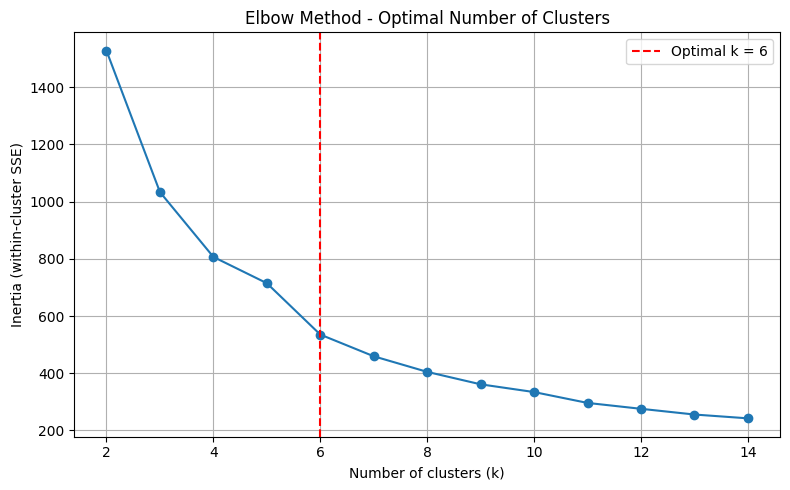

In [ ]:
# Assicurati di avere kneed installato
!pip install kneed

from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# === 1. Calcola l'inerzia per diversi valori di k
inertias = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(reduced_embeddings)  # usa embedding ridotti via PCA
    inertias.append(kmeans.inertia_)

# === 2. Trova il punto di gomito (elbow)
knee = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"📌 Numero ottimale di cluster (Elbow): {optimal_k}")

# === 3. Plot del metodo del gomito
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method - Optimal Number of Clusters")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_embeddings)
df["cluster"] = cluster_labels

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


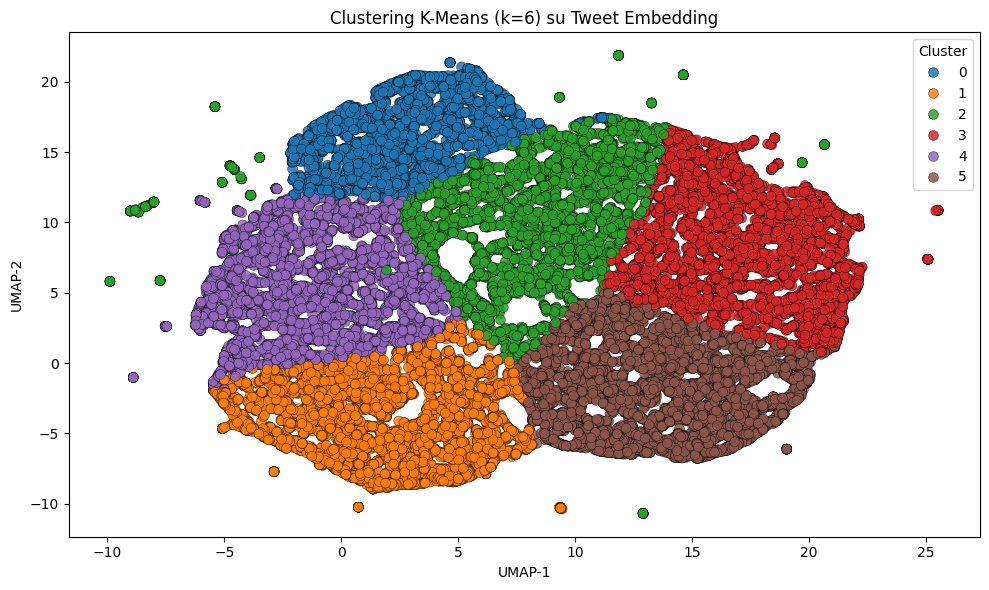

In [ ]:
import umap.umap_ as umap
import seaborn as sns


umap_2d = umap.UMAP(n_neighbors=15, min_dist=0.1, metric="euclidean").fit_transform(reduced_embeddings)
df["UMAP-1"] = umap_2d[:, 0]
df["UMAP-2"] = umap_2d[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="UMAP-1", y="UMAP-2",
    hue="cluster", palette="tab10", s=50,
    edgecolor="black", linewidth=0.3, alpha=0.85
)
plt.title(f"Clustering K-Means (k={optimal_k}) su Tweet Embedding")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(reduced_embeddings, cluster_labels)
print(f"✅ Silhouette Score: {score:.3f}")

✅ Silhouette Score: 0.360


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_terms_per_cluster(df, n_terms=6):
    vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
    summaries = {}
    for cluster_id in sorted(df["cluster"].unique()):
        texts = df[df["cluster"] == cluster_id]["text"].dropna().astype(str)
        if texts.empty:
            summaries[cluster_id] = ["(nessun testo valido)"]
            continue
        tfidf_matrix = vectorizer.fit_transform(texts)
        mean_tfidf = tfidf_matrix.mean(axis=0).A1
        terms = vectorizer.get_feature_names_out()
        top_indices = mean_tfidf.argsort()[::-1][:n_terms]
        summaries[cluster_id] = [terms[i] for i in top_indices]
    return summaries

labels = get_top_terms_per_cluster(df)
for cid, words in labels.items():
    print(f"🧠 Cluster {cid}: {', '.join(words)}")


🧠 Cluster 0: biden, trump, hunter, news, usa, 4chan
🧠 Cluster 1: news, usa, sunday, ukraine, slava, new
🧠 Cluster 2: tigray, russia, ukraine, war, siege, end
🧠 Cluster 3: ukraine, russia, war, putin, russian, stop
🧠 Cluster 4: news, usa, biden, law, trump, breaking
🧠 Cluster 5: ukraine, war, russia, russian, ukrainian, stand


📏 Distanza tra i centroidi (euclidea):
           Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5
Cluster 0      0.000      0.462      0.315      0.582      0.274      0.653
Cluster 1      0.462      0.000      0.384      0.627      0.191      0.500
Cluster 2      0.315      0.384      0.000      0.297      0.301      0.340
Cluster 3      0.582      0.627      0.297      0.000      0.592      0.255
Cluster 4      0.274      0.191      0.301      0.592      0.000      0.546
Cluster 5      0.653      0.500      0.340      0.255      0.546      0.000


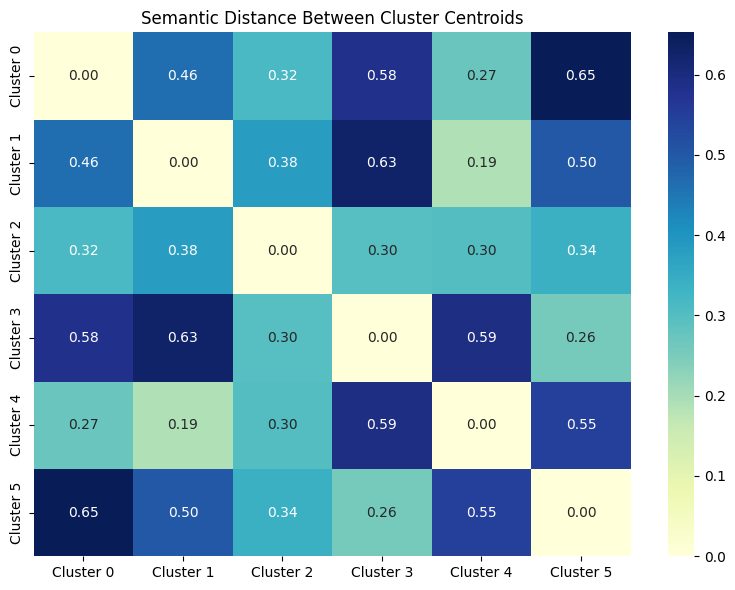

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Estrai i centroidi dal modello KMeans
centroids = kmeans.cluster_centers_

# === 2. Calcola la matrice delle distanze euclidee tra i centroidi
centroid_distances = euclidean_distances(centroids)

# === 3. Costruisci un DataFrame leggibile
dist_df = pd.DataFrame(centroid_distances,
                       columns=[f'Cluster {i}' for i in range(optimal_k)],
                       index=[f'Cluster {i}' for i in range(optimal_k)])

# === 4. Visualizza la matrice
print("📏 Distanza tra i centroidi (euclidea):")
print(dist_df.round(3))

# === 5. Heatmap per visualizzazione
plt.figure(figsize=(8, 6))
sns.heatmap(dist_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Semantic Distance Between Cluster Centroids")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# === 1. Assicurati che ci sia una colonna 'cluster' e 'text'
assert "cluster" in df.columns and "text" in df.columns, "Colonne mancanti nel DataFrame"

# === 2. Prepara i testi uniti per ciascun cluster
cluster_texts = df.groupby("cluster")["text"].apply(lambda x: " ".join(x.astype(str)))

# === 3. Calcola TF-IDF sulle frasi aggregate
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(cluster_texts)
terms = vectorizer.get_feature_names_out()

# === 4. Estrai le top parole per cluster
top_n = 10
keywords_per_cluster = {}

for cluster_id in range(tfidf_matrix.shape[0]):
    row = tfidf_matrix[cluster_id].toarray().flatten()
    top_indices = row.argsort()[::-1][:top_n]
    keywords = [terms[i] for i in top_indices]
    keywords_per_cluster[cluster_id] = keywords

# === 5. Stampa parole chiave
print("🧠 Parole chiave per cluster:")
for cluster, keywords in keywords_per_cluster.items():
    print(f"Cluster {cluster}: {', '.join(keywords)}")


🧠 Parole chiave per cluster:
Cluster 0: biden, trump, news, hunter, usa, 4chan, america, president, joe, democrats
Cluster 1: news, usa, sunday, ukraine, new, cur, love, nft, 2022, art
Cluster 2: tigray, ukraine, russia, war, end, siege, russian, putin, people, news
Cluster 3: ukraine, russia, war, russian, putin, stop, stand, crimes, state, ukrainian
Cluster 4: news, usa, biden, law, trump, breaking, new, sri, crypto, world
Cluster 5: ukraine, war, russia, russian, ukrainian, stand, donetsk, forces, people, army
